<h1>Importing Packages and Loading Data</h1>

In [2]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler , RobustScaler , LabelEncoder ,OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_predict , cross_val_score,StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (roc_auc_score, recall_score, precision_recall_curve,
                             precision_score, f1_score, ConfusionMatrixDisplay,
                             confusion_matrix, roc_curve,classification_report,accuracy_score,
                             RocCurveDisplay, PrecisionRecallDisplay,auc,fbeta_score)
import shap
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('train_dataset_final1.csv')
val_df = pd.read_csv('validate_dataset_final.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
val_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


<h1>Data Exploration and Data Cleaning</h1>

In [8]:
print(f'SHAPE: {train_df.shape};\n Rows: {train_df.shape[0]}\n Columns: {train_df.shape[1]}')

SHAPE: (25247, 27);
 Rows: 25247
 Columns: 27


In [9]:
cols = train_df.columns
print(cols)

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')


In [10]:
val_df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [11]:
train_df.rename(columns = {'pay_0' : 'pay_1','next_month_default' : 'Default'},inplace = True)
val_df.rename(columns = {'pay_0' : 'pay_1'} , inplace = True )

<I>Renaming the pay_0 and next_month default for better understanding</I>

In [13]:
# Check for duplicates
train_df.duplicated().sum()

0

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        25247 non-null  int64  
 1   marriage           25247 non-null  int64  
 2   sex                25247 non-null  int64  
 3   education          25247 non-null  int64  
 4   LIMIT_BAL          25247 non-null  int64  
 5   age                25121 non-null  float64
 6   pay_1              25247 non-null  int64  
 7   pay_2              25247 non-null  int64  
 8   pay_3              25247 non-null  int64  
 9   pay_4              25247 non-null  int64  
 10  pay_5              25247 non-null  int64  
 11  pay_6              25247 non-null  int64  
 12  Bill_amt1          25247 non-null  float64
 13  Bill_amt2          25247 non-null  float64
 14  Bill_amt3          25247 non-null  float64
 15  Bill_amt4          25247 non-null  float64
 16  Bill_amt5          252

In [15]:
train_df.isnull().sum()

Customer_ID            0
marriage               0
sex                    0
education              0
LIMIT_BAL              0
age                  126
pay_1                  0
pay_2                  0
pay_3                  0
pay_4                  0
pay_5                  0
pay_6                  0
Bill_amt1              0
Bill_amt2              0
Bill_amt3              0
Bill_amt4              0
Bill_amt5              0
Bill_amt6              0
pay_amt1               0
pay_amt2               0
pay_amt3               0
pay_amt4               0
pay_amt5               0
pay_amt6               0
AVG_Bill_amt           0
PAY_TO_BILL_ratio      0
Default                0
dtype: int64

<ul>
<li><I>There are 126 null values in the age column.</I></li>
<li><I> All variables are in numerical type. But SEX, EDUCATION, MARRIAGE, PAY_1 - PAY_6, and DEFAULT are suppose to be categorical.</I></li>

In [17]:
## Impute missing values in the 'age' column using the median age within each demographic group
train_df['age'] = train_df.groupby(['sex', 'marriage', 'education'])['age'].transform(lambda x: x.fillna(x.median()))

<ul><I>
<li> Grouping is done by 'sex,' 'education,' and 'marriage' to ensure that imputation respects customer profiles.</li>
<li>The median is used instead of mean to reduce the influence of outliers (e.g., extremely young or old customers).</li>
</ul>

<h4>Demographic features (Description):</h4>
Marital status of the customer (1 = Married, 
2 = Single, 3 = Others)<br>
Gender of the customer (1 = Male, 0 = 
Female)<br>
Education level (1 = Graduate School, 2 = 
University, 3 = High School, 4 = Others)<br>   

In [20]:
print(train_df['sex'].value_counts(), '\n')
print(train_df['education'].value_counts(), '\n')
print(train_df['marriage'].value_counts(), '\n')

sex
1    15252
0     9995
Name: count, dtype: int64 

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64 

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64 



<ul>
    <li>There are 7 unique values in 'education' but only 4 provided in the dataset description.(0,5,6 are undocumented)</li>
    <li>There are 4 unique values in 'marriage' but only 3 provided in the dataset description.(0 is undocumented)</li>
</ul>

In [22]:
# Replace values 0, 5, and 6 with 4 in the 'education' column
train_df['education'] = train_df['education'].replace({0:4,5:4,6:4})
# Replace value 0 with 3 in 'marriage' colunn
train_df['marriage'] = train_df['marriage'].replace({0:3})

In [23]:
print(train_df['education'].value_counts())
print(train_df['marriage'].value_counts())

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64
marriage
2    13441
1    11480
3      326
Name: count, dtype: int64


<h4>Checking for undocumneted values in validation dataset</h4>

In [25]:
print(val_df['sex'].value_counts(), '\n')
print(val_df['education'].value_counts(), '\n')
print(val_df['marriage'].value_counts(), '\n')

sex
1    3043
0    1973
Name: count, dtype: int64 

education
2    2374
1    1796
3     760
5      54
4      20
6      10
0       2
Name: count, dtype: int64 

marriage
2    2702
1    2262
3      43
0       9
Name: count, dtype: int64 



In [26]:
# Replace values 0, 5, and 6 with 4 in the 'education' column
val_df['education'] = val_df['education'].replace({0:4,5:4,6:4})
# Replace value 0 with 3 in 'marriage' colunn
val_df['marriage'] = val_df['marriage'].replace({0:3})

In [27]:
cat_cols = ['sex', 'marriage', 'education']
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    val_df[col] = val_df[col].astype('category')

In [28]:
# Payment delay 
for i in range(1, 7):
    col = f'pay_{i}'
    print(f"Value counts for {col}:\n{train_df[col].value_counts()}\n")

Value counts for pay_1:
pay_1
 0    12667
-1     4821
 1     3030
-2     2331
 2     2047
 3      244
 4       56
 5       21
 8       14
 6        8
 7        8
Name: count, dtype: int64

Value counts for pay_2:
pay_2
 0    13424
-1     5128
-2     3210
 2     3098
 3      239
 4       77
 1       25
 5       19
 7       15
 6       11
 8        1
Name: count, dtype: int64

Value counts for pay_3:
pay_3
 0    13415
-1     5019
-2     3480
 2     3039
 3      179
 4       57
 7       18
 5       18
 6       17
 1        4
 8        1
Name: count, dtype: int64

Value counts for pay_4:
pay_4
 0    13961
-1     4816
-2     3694
 2     2509
 3      137
 4       52
 7       43
 5       29
 6        4
 1        2
Name: count, dtype: int64

Value counts for pay_5:
pay_5
 0    14345
-1     4680
-2     3859
 2     2100
 3      133
 4       72
 7       43
 5       14
 6        1
Name: count, dtype: int64

Value counts for pay_6:
pay_6
 0    13769
-1     4882
-2     4139
 2     2223
 3      134
 

In [29]:
# Payment delay description
train_df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680
std,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000


In [30]:
# Bill Statement description
train_df[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].describe()

,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6
count,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000
mean,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029
std,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000
50%,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000
75%,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000
max,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000


In [31]:
#Previous Payment Description
train_df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000
mean,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287
std,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000
50%,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000
75%,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000
max,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000


In [32]:
#Drop Customer_ID column
train_df.drop(columns=['Customer_ID'], inplace=True)

In [33]:
train_df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,Default
0,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [34]:
val_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


#  Exploratory Data Analysis (EDA)

The percentage of defaulters in the dataset: 19.040% 



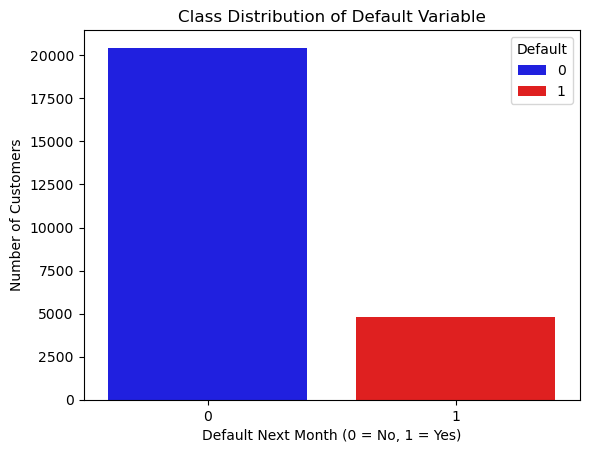

In [36]:
perc_def = train_df.Default.sum() / len(train_df.Default)
print(f'The percentage of defaulters in the dataset: {perc_def*100:.3f}% \n')
sns.countplot(x='Default', data=train_df, palette=['blue', 'red'],hue = 'Default',legend = True )

plt.title('Class Distribution of Default Variable')
plt.xlabel('Default Next Month (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.savefig('Default.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
counts = train_df['Default'].value_counts()
percentages = train_df['Default'].value_counts(normalize=True) * 100

for val in counts.index:
    print(f"Value: {val} | Count: {counts[val]} | Percentage: {percentages[val]:.2f}%")

Value: 0 | Count: 20440 | Percentage: 80.96%
Value: 1 | Count: 4807 | Percentage: 19.04%


<h3>Categorical Columns (SEX, EDUCATION, MARRIAGE)</h3>

<h4>Demographic features (Description):</h4>
<ul>
<li>Marital status of the customer (1 = Married, 
2 = Single, 3 = Others)</li>
<li>Gender of the customer (1 = Male, 0 = 
Female)</li>
<li>Education level (1 = Graduate School, 2 = 
University, 3 = High School, 4 = Others)</li> 
</ul>


SEX
Value  Count  Percentage
    0   9995       39.59
    1  15252       60.41
------------------------------


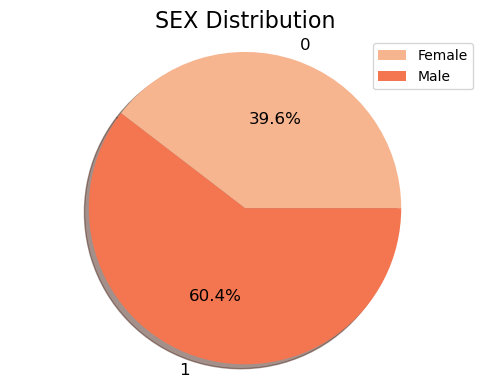


MARRIAGE
Value  Count  Percentage
    1  11480       45.47
    2  13441       53.24
    3    326        1.29
------------------------------


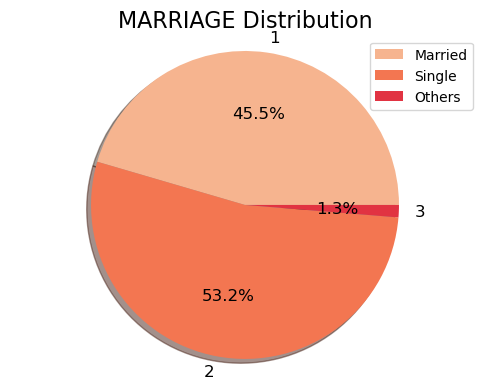


EDUCATION
Value  Count  Percentage
    1   8988       35.60
    2  11717       46.41
    3   4115       16.30
    4    427        1.69
------------------------------


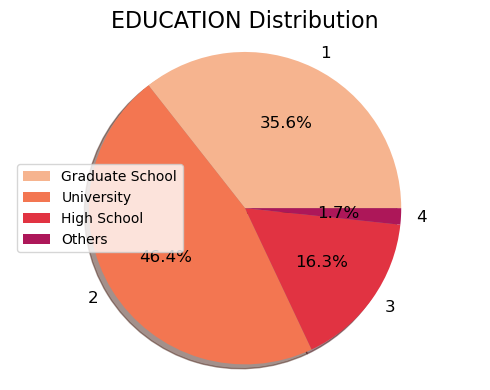

In [40]:
def show_value_counts(df, col,leg):
    vc = df[col].value_counts()
    pct = vc / len(df) * 100
    summary = pd.DataFrame({'Value': vc.index, 'Count': vc.values, 'Percentage': pct.round(2)})
    summary = summary.sort_values(by='Value')
    
    print(f"\n{col.upper()}")
    print(summary.to_string(index=False))
    print('-' * 30)

    # Pie chart
    plt.figure(figsize=(5, 4))
    plt.pie(summary['Count'], labels=summary['Value'], autopct='%1.1f%%',textprops={'fontsize': 12},shadow = True,colors=sns.color_palette('rocket_r'))
    plt.title(f"{col.upper()} Distribution",fontsize=16)
    plt.legend(leg)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f'{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

show_value_counts(train_df, 'sex',['Female','Male'])
show_value_counts(train_df, 'marriage',['Married','Single','Others'])
show_value_counts(train_df, 'education',['Graduate School','University','High School','Others'])

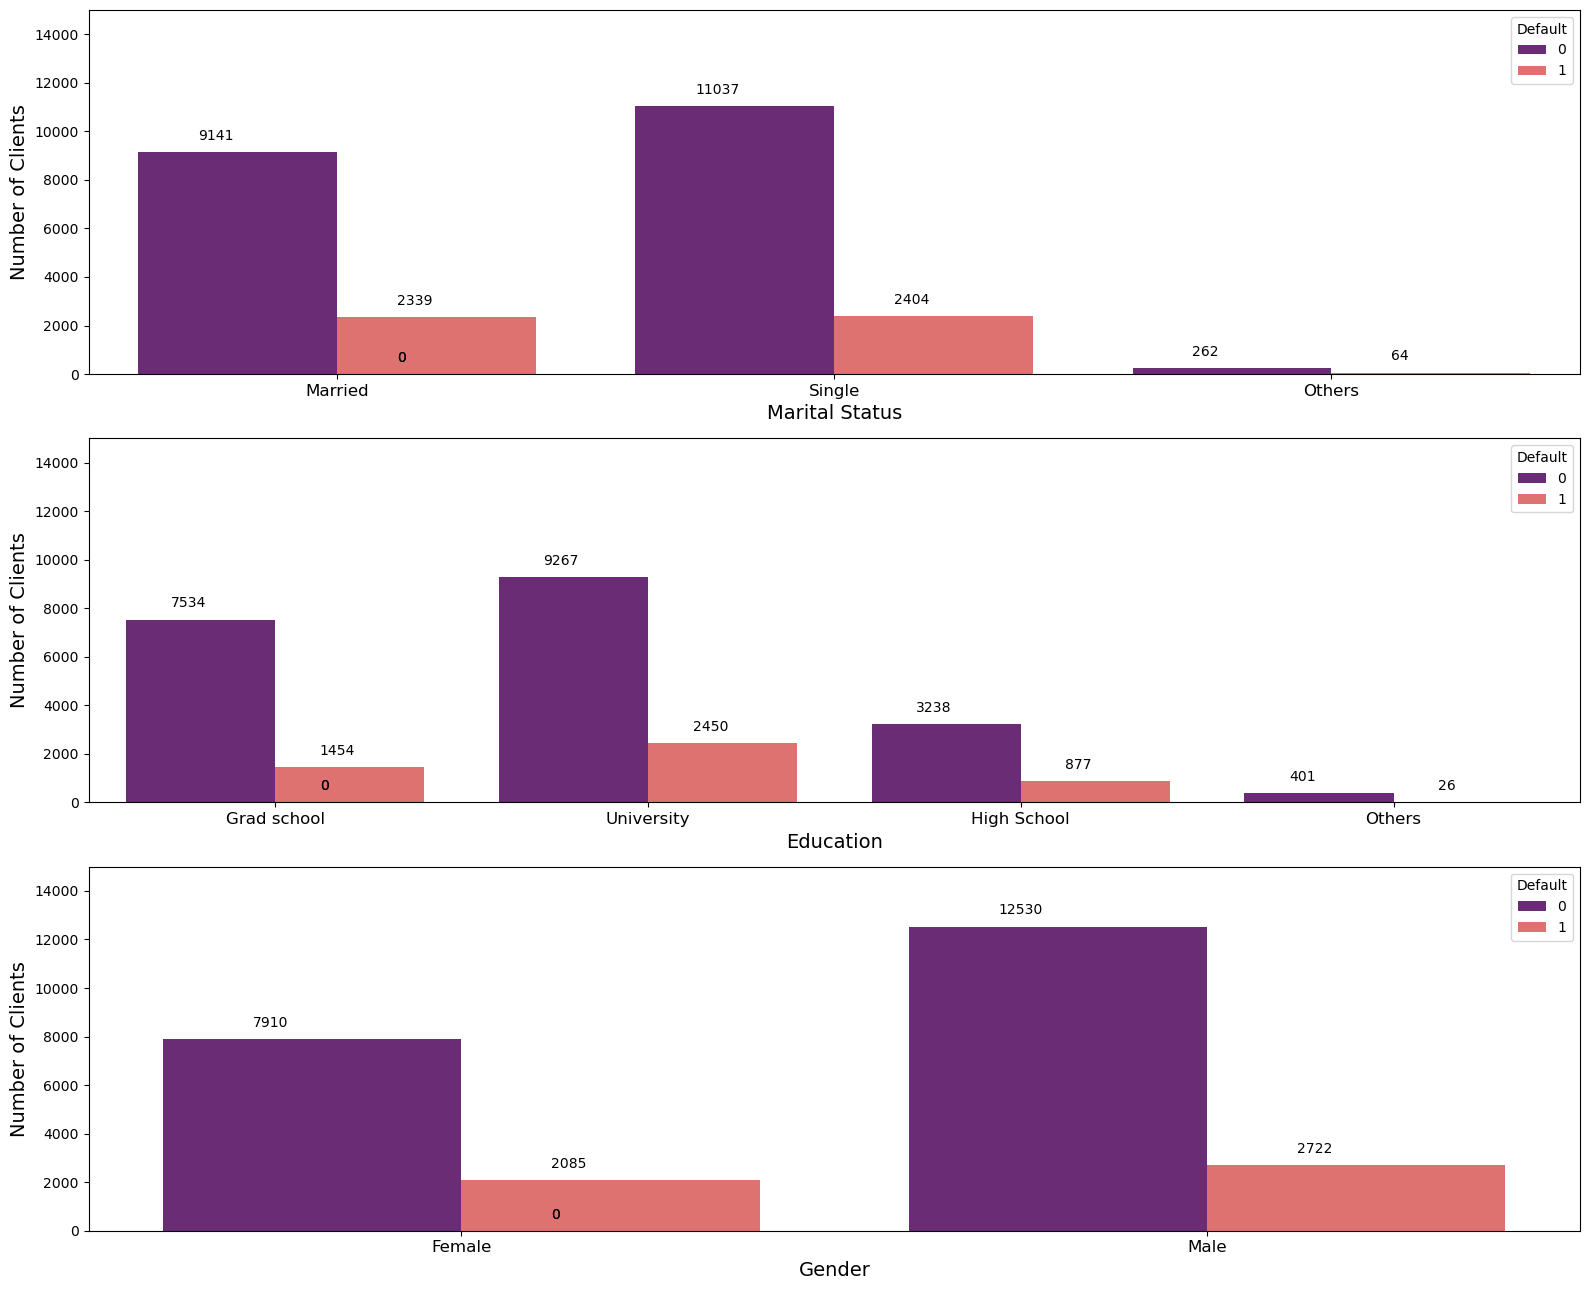

In [41]:
fig, axes = plt.subplots(3,1,figsize=(16, 13))

# Count plot for MARRIAGE
ax1 = sns.countplot(data=train_df, x='marriage', hue='Default', palette='magma', ax=axes[0])
ax1.set_xlabel("Marital Status", fontsize=14)
ax1.set_ylabel("Number of Clients", fontsize=14)
ax1.set_ylim(0, 15000)
ax1.set_xticks([0, 1, 2],['Married', 'Single','Others'],fontsize=12)
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for EDUCATION
ax2 = sns.countplot(data=train_df, x='education', hue='Default', palette='magma', ax=axes[1])
ax2.set_xlabel("Education", fontsize=14)
ax2.set_ylabel("Number of Clients", fontsize=14)
ax2.set_ylim(0, 15000)
ax2.set_xticks([0, 1, 2, 3],['Grad school', 'University', 'High School','Others'],fontsize=12)
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for SEX
ax3 = sns.countplot(data=train_df, x='sex', hue='Default', palette='magma', ax=axes[2])
ax3.set_xlabel("Gender", fontsize=14)
ax3.set_ylabel("Number of Clients", fontsize=14)
ax3.set_ylim(0, 15000)
ax3.set_xticks([0, 1],['Female','Male'],fontsize = 12)
for p in ax3.patches:
    ax3.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

plt.tight_layout()
plt.savefig('Demographic(def).png', dpi=300, bbox_inches='tight')
plt.show()

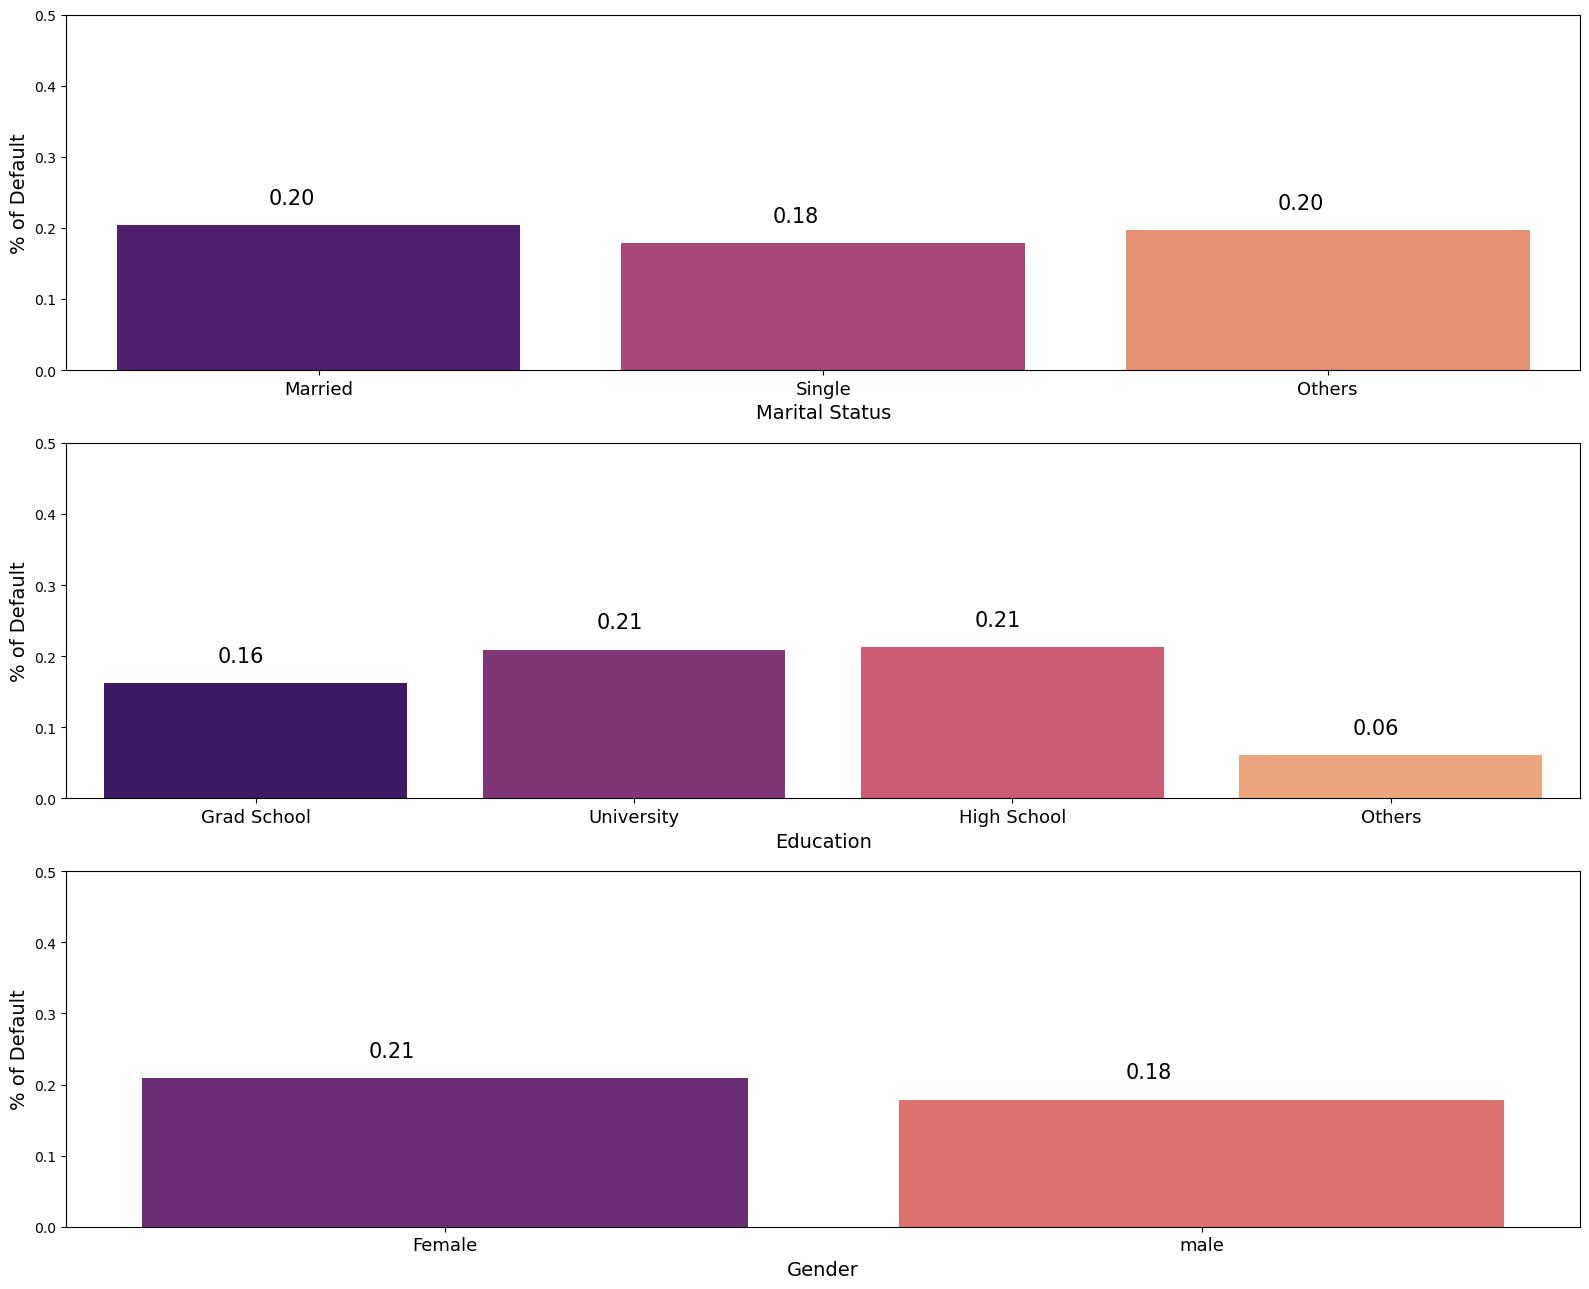

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 13))

# Bar plot for MARRIAGE
ax1 = sns.barplot(x="marriage", y="Default", data=train_df, palette='magma', errorbar=None, ax=axes[0],hue='marriage',legend=False)
ax1.set_ylabel("% of Default", fontsize=14)
ax1.set_xlabel("Marital Status", fontsize=14)
ax1.set_ylim(0, 0.5)
ax1.set_xticks([0,1,2],['Married', 'Single', 'Others'], fontsize=13)
for p in ax1.patches:
    ax1.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for EDUCATION
ax2 = sns.barplot(x="education", y="Default", data=train_df, palette='magma',errorbar = None, ax=axes[1],hue='education',legend=False)
ax2.set_ylabel("% of Default", fontsize=14)
ax2.set_xlabel("Education", fontsize=14)
ax2.set_ylim(0, 0.5)
ax2.set_xticks([0, 1, 2, 3],['Grad School', 'University', 'High School', 'Others'], fontsize=13)
for p in ax2.patches:
    ax2.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for SEX
ax3 = sns.barplot(x="sex", y="Default", data=train_df, palette='magma', errorbar=None, ax=axes[2],hue='sex',legend=False)
ax3.set_ylabel("% of Default", fontsize=14)
ax3.set_xlabel("Gender", fontsize=14)
ax3.set_ylim(0, 0.5)
ax3.set_xticks([0, 1],['Female','male'],fontsize=13)
for p in ax3.patches:
    ax3.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

plt.tight_layout()
plt.savefig('Demographic_Default.png', dpi=300, bbox_inches='tight')
plt.show()

<ul><I>
    <li> The likelihood of being a defaulter decreases as education level increases.</li>
    <li> Married and other (probably divorced) customers have an approx. 0.20 probability of being defaulters, which is slightly more than single individuals that have approx 0.18 probability of being a defaulter. </li>
    <li> Despite smaller number of females in the dataset compared to males, females exhibit a higher likelihood of being defaulters.</li>
</ul>

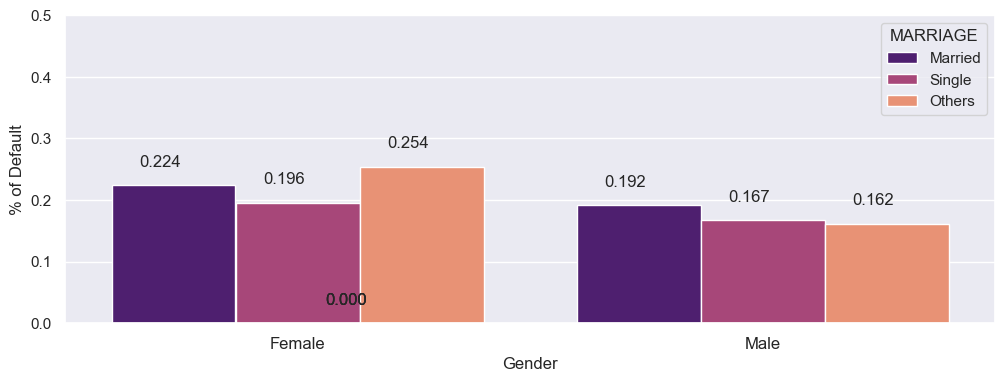

In [44]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
ax = sns.barplot(x = "sex", y = "Default", hue = "marriage", data = train_df, palette = 'magma', errorbar=None)
plt.xlabel("Gender",fontsize=12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Female','Male'], fontsize = 12)
plt.legend(['Married', 'Single','Others'], title = 'MARRIAGE')
# ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)
               
plt.savefig('Gender_def(marriage).png', dpi=300, bbox_inches='tight')
plt.show()

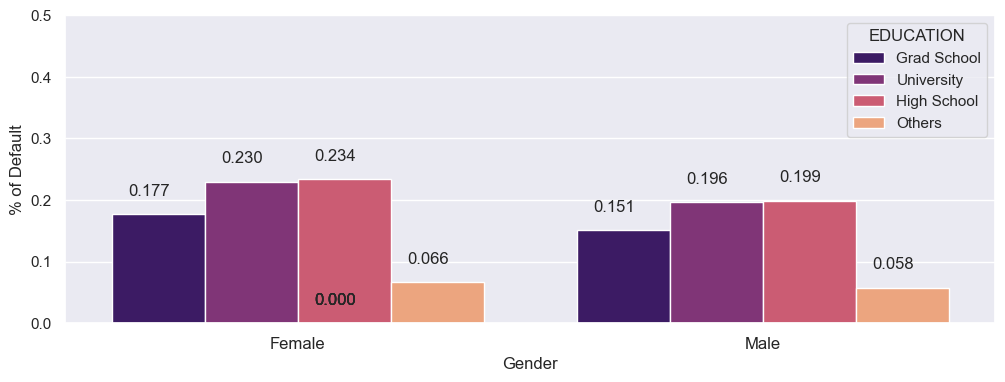

In [45]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
ax = sns.barplot(x = "sex", y = "Default", hue = "education", data = train_df, palette = 'magma', errorbar=None)
plt.xlabel("Gender",fontsize=12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Female','Male'], fontsize = 12)
plt.legend(['Grad School', 'University', 'High School', 'Others'], title = 'EDUCATION')

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.savefig('Gender_def(education).png', dpi=300, bbox_inches='tight')
plt.show()

<ul><I>
    <li> Being Female, married, and having high school education seems to increase the likelihood of being defaulters.</li>
    <li> Female customers who are marked as 'others' in their marital status (probably divorced) have a notable probability of around 0.254 for facing defaults. (comparatively higher) </li>
</ul>

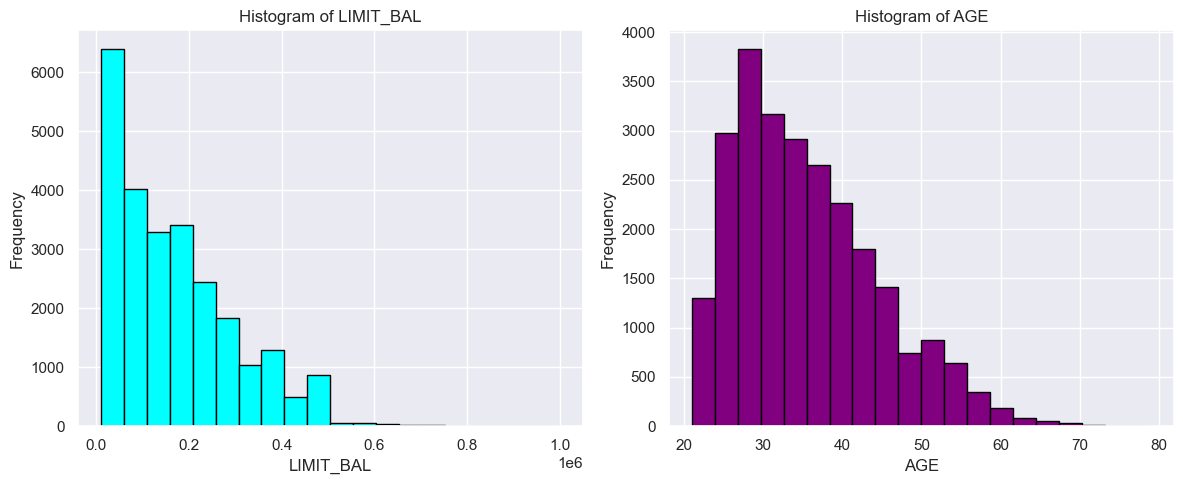

In [47]:
plt.figure(figsize=(12,5))

# Histogram of LIMIT_BAL
plt.subplot(1, 2, 1)
plt.hist(train_df['LIMIT_BAL'], bins=20, color='cyan', edgecolor='black')
plt.title('Histogram of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')

# Histogram of AGE
plt.subplot(1, 2, 2)
plt.hist(train_df['age'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Limit&Age.png', dpi=300, bbox_inches='tight')
plt.show()

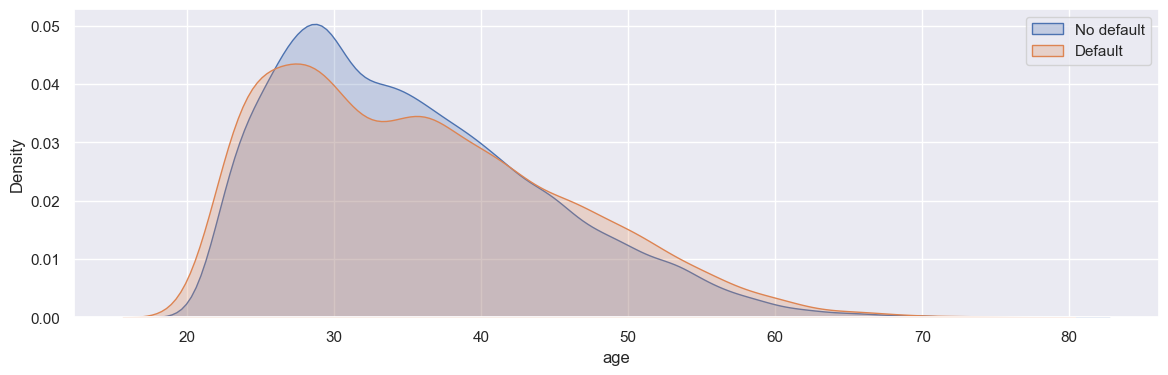

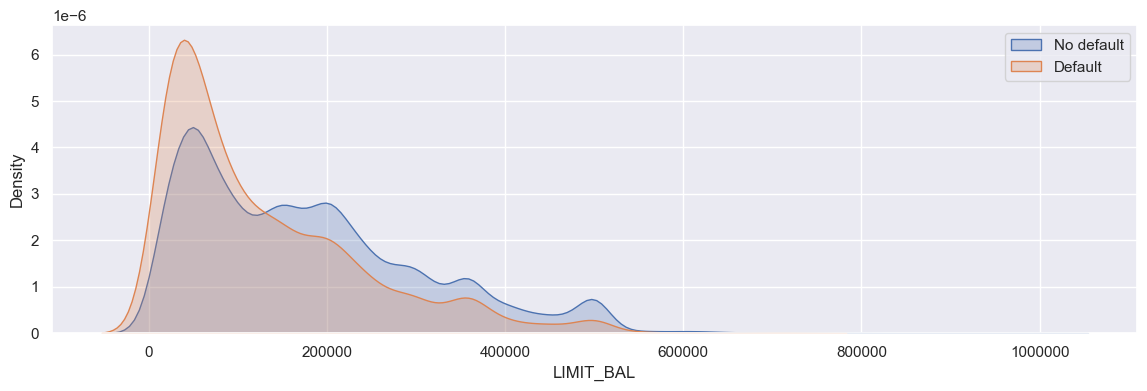

In [48]:
def kernel_density(col):
    plt.figure(figsize=(14,4)) 
    sns.set(font_scale=1)
    sns.kdeplot(train_df.loc[(train_df['Default'] == 0), col], label = 'No default', fill=True)
    sns.kdeplot(train_df.loc[(train_df['Default'] == 1), col], label = 'Default', fill=True)
    plt.ticklabel_format(style='plain', axis='x') 
    # plt.ylabel('')
    plt.legend()
    plt.savefig(f'{col}(kde).png', dpi=300, bbox_inches='tight')
    plt.show()

kernel_density('age')
kernel_density('LIMIT_BAL')

Between the age 25 and 40 the chance of default is a little lower.

<B>Let us make categories in 'age' and 'LIMIT_BAL" which will further help in the analysis

In [51]:
train_df['AgeBin'] = pd.cut(train_df['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(train_df['AgeBin'].value_counts())

AgeBin
(25, 30]    6071
(40, 50]    4985
(30, 35]    4885
(35, 40]    4203
(20, 25]    3224
(50, 60]    1662
(60, 80]     217
Name: count, dtype: int64


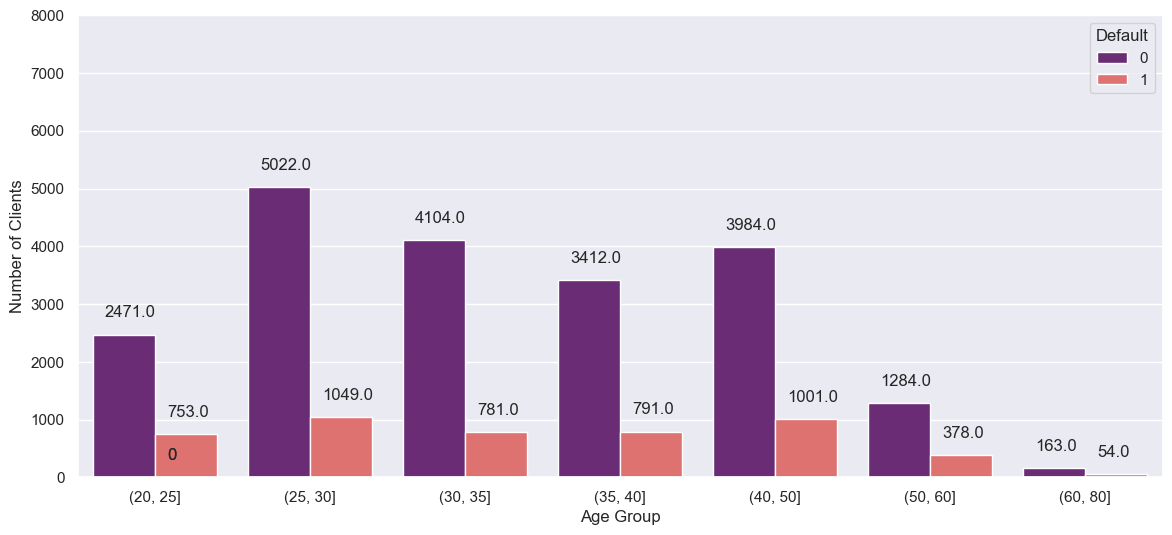

In [52]:
plt.figure(figsize=(14,6))

train_df['AgeBin'] = train_df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = train_df, x = 'AgeBin', hue="Default", palette = 'magma', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.savefig('AgeGroup(Default).png', dpi=300, bbox_inches='tight')
plt.show()

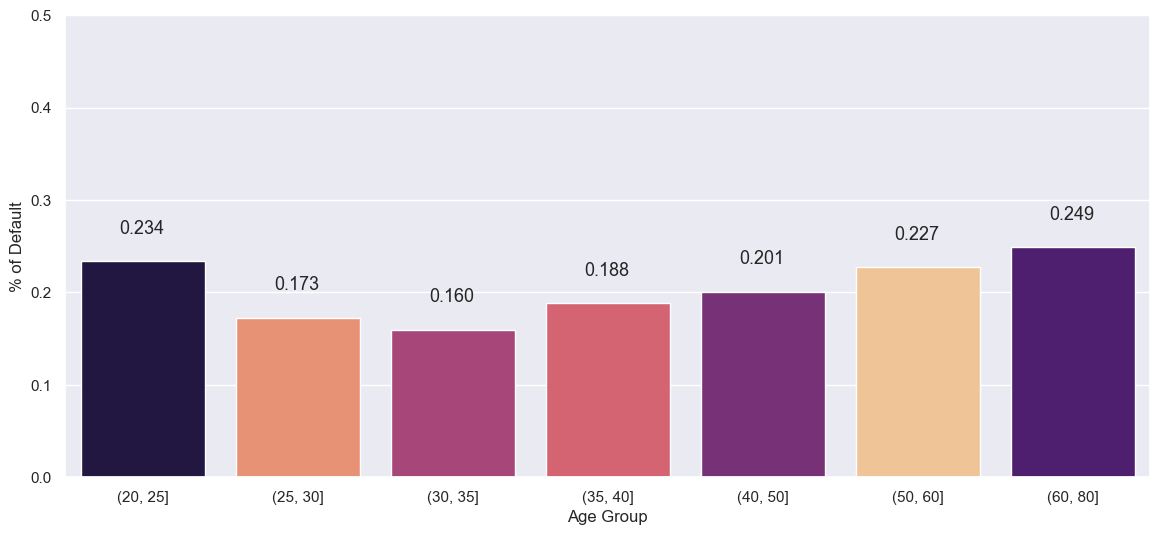

In [53]:
plt.figure(figsize=(14,6))

ax = sns.barplot(x = "AgeBin", y = "Default", data = train_df, palette = 'magma', errorbar = None, order = AgeBin_order , hue = 'AgeBin',legend=False)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.savefig('AgeGrp_def.png', dpi=300, bbox_inches='tight')
plt.show()

<I><li>Individuals aged between 20 & 25 and those above 50, are more prone to default on their credit card payments. </li>

In [55]:
train_df['LimitBin'] = pd.cut(train_df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(train_df['LimitBin'].value_counts())

LimitBin
(5000, 50000]        6391
(200000, 300000]     4284
(50000, 100000]      4016
(150000, 200000]     3409
(100000, 150000]     3290
(300000, 400000]     2322
(400000, 500000]     1357
(500000, 1100000]     178
Name: count, dtype: int64


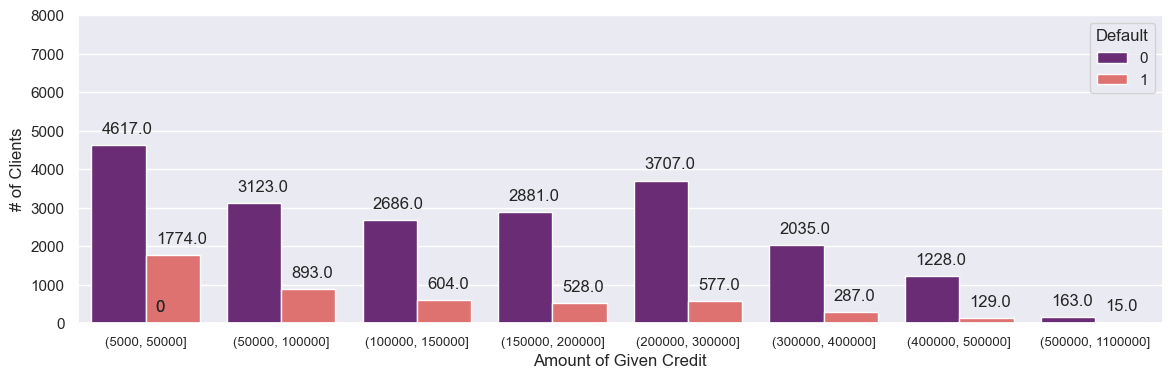

In [56]:
plt.figure(figsize=(14,4))
sns.set(font_scale=1)
train_df['LimitBin'] = train_df['LimitBin'].astype('str') 

LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data=train_df, x='LimitBin' , hue="Default", palette = 'magma', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.savefig('LimitBin(Default).png', dpi=300, bbox_inches='tight')
plt.show()

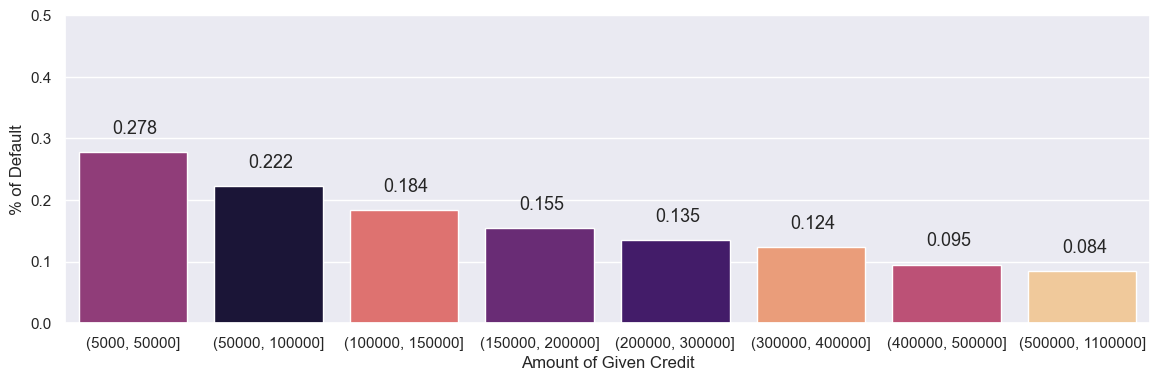

In [57]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "Default", data = train_df, palette = 'magma', errorbar = None, order = LimitBin_order,hue='LimitBin',legend=False)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.savefig('LimitBin_def.png', dpi=300, bbox_inches='tight')
plt.show()

<I>
<li> There is high probability of around 0.28  for individuals facing defaults that have credit limit of 50k or less. </li>
<li> Almost 50% of defaulter have credit limit less than 100k.</li>
<li>The higher the limit the lower is the chance of default</li>

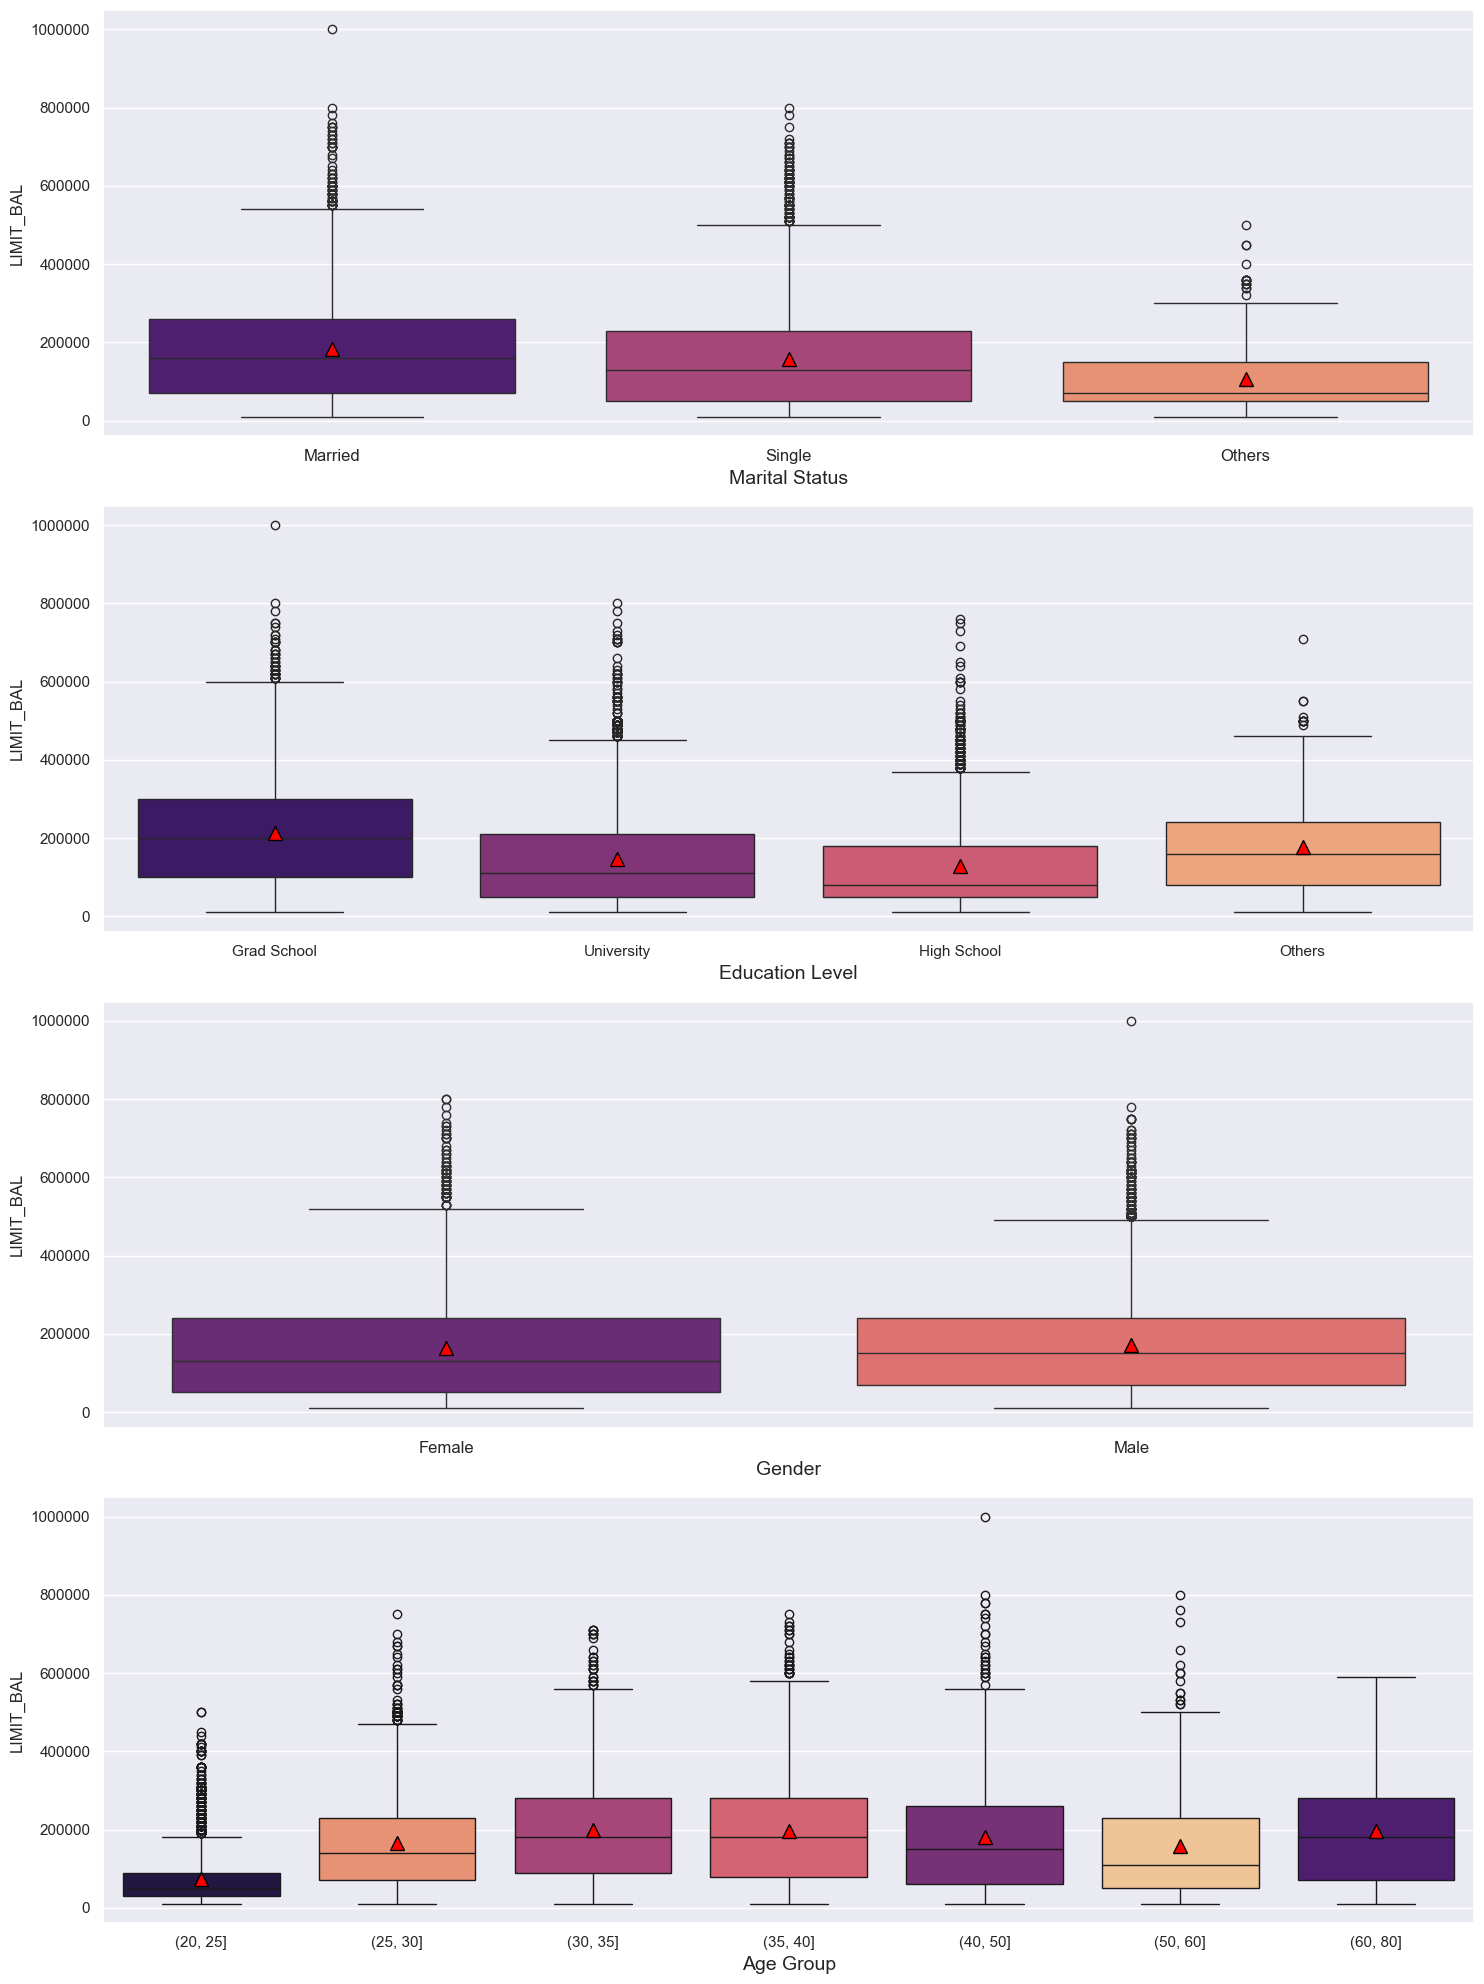

In [59]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.boxplot(x="marriage", y="LIMIT_BAL", data=train_df, palette='magma', showmeans=True, hue = 'marriage', legend=False,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=12)
plt.xlabel("Marital Status", fontsize=14)


plt.subplot(4, 1, 2)
sns.boxplot(x="education", y="LIMIT_BAL", data=train_df, palette='magma', showmeans=True, hue = 'education', legend=False,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)
plt.xlabel("Education Level", fontsize=14)


plt.subplot(4, 1, 3)
sns.boxplot(x="sex", y="LIMIT_BAL", data=train_df, palette='magma', showmeans=True, hue = 'sex', legend=False,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1], ['Female','Male'], fontsize=12)
plt.xlabel("Gender", fontsize=14)


plt.subplot(4, 1, 4)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", data=train_df, palette='magma', showmeans=True, order=AgeBin_order,hue = 'AgeBin', legend=False,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize=14)

plt.tight_layout()
plt.savefig('Demographic_Limit.png', dpi=300, bbox_inches='tight')
plt.show()

<i>
<li>The person with the highest credit limit (i.e., 1 million) is male, married, and belongs to 40 to 50 age group. </li>

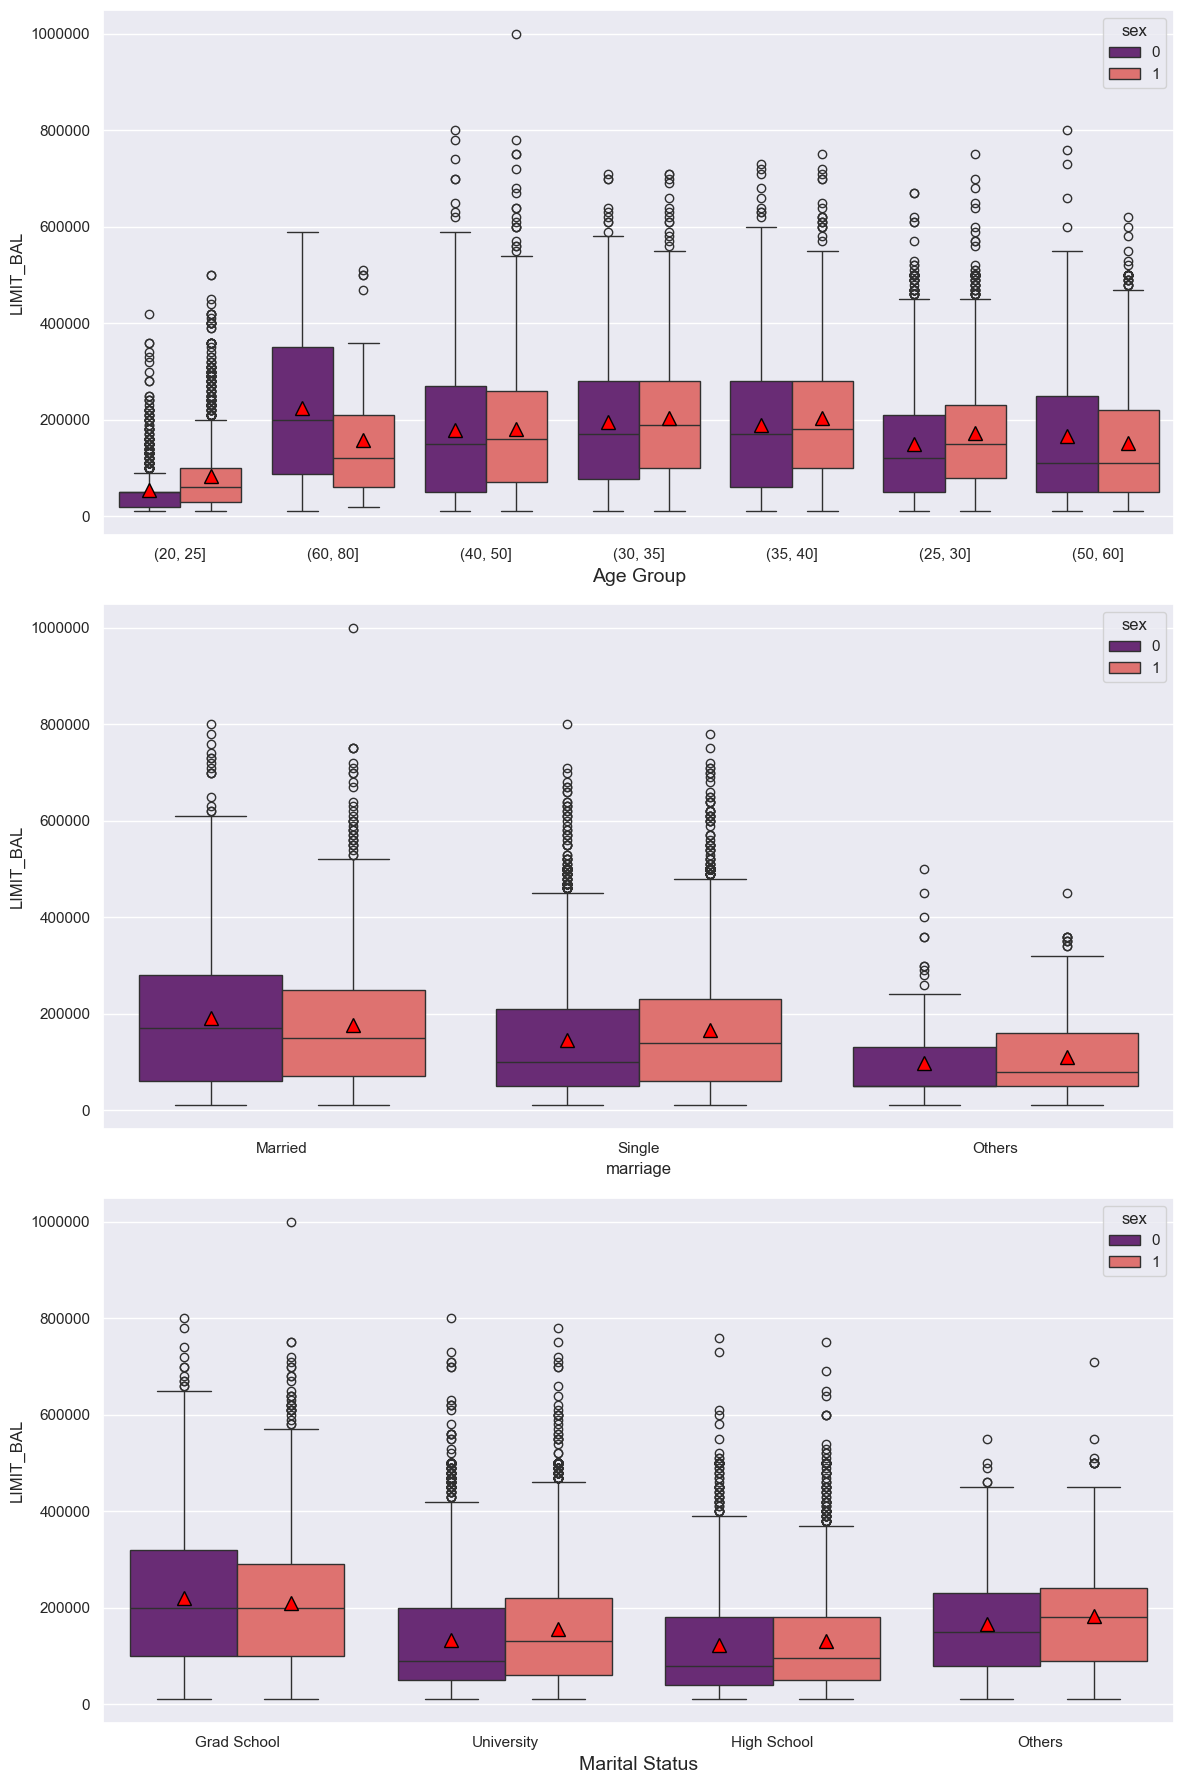

In [61]:
plt.figure(figsize=(12, 18))

# Subplot for AgeBin
plt.subplot(3, 1, 1)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", hue='sex', data=train_df, palette='magma', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize=14)

# Subplot for Marriage
plt.subplot(3, 1, 2)
sns.boxplot(x="marriage", y="LIMIT_BAL", hue='sex', data=train_df, palette='magma', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single','Others'], fontsize=11)

# Subplot for Education
plt.subplot(3, 1, 3)
sns.boxplot(x="education", y="LIMIT_BAL", hue='sex', data=train_df, palette='magma', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)
plt.xlabel("Education Level", fontsize=14)
plt.xlabel("Marital Status", fontsize=14)

plt.tight_layout()
plt.savefig('AMM_Limit(sex).png', dpi=300, bbox_inches='tight')
plt.show()

<i>
<li>The average given credit for men was slightly higher than for women. That still holds up for several combinations of categories, except among customers that:
        <ol>
            <li> Have a grad school diploma;</li>
            <li> Are married;</li>
            <li> Are 50+ years old.</li>
        </ol>
</li>

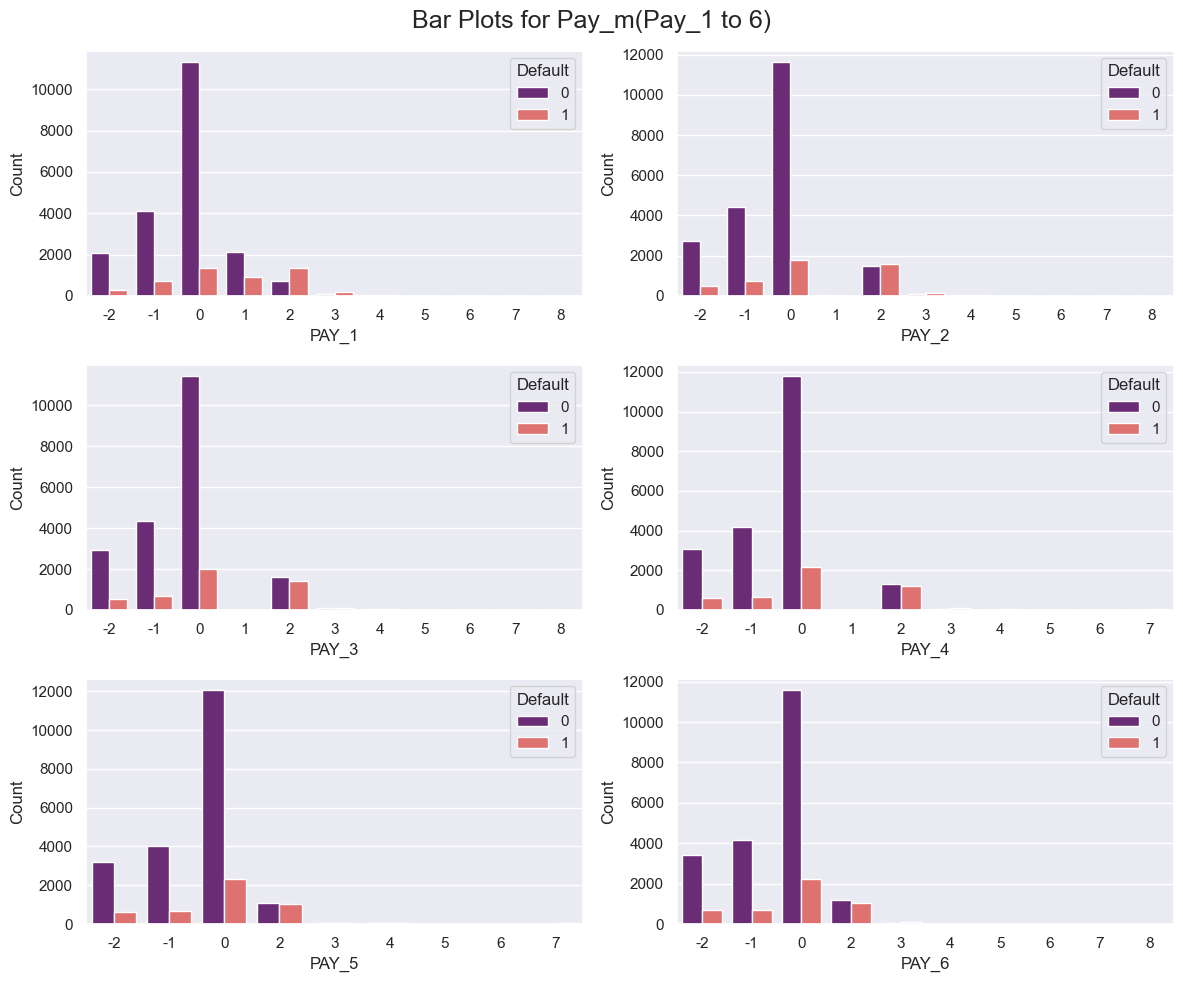

In [63]:
# Create subplots
fig, axs = plt.subplots(3,2, figsize=(12, 10))
fig.suptitle("Bar Plots for Pay_m(Pay_1 to 6)",fontsize=18)

# Plot for PAY_1 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_1', ax=axs[0, 0], palette = 'magma', hue='Default')
axs[0, 0].set_xlabel('PAY_1')
axs[0, 0].set_ylabel('Count')

# Plot for PAY_2 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_2', ax=axs[0, 1], palette = 'magma', hue='Default')
axs[0, 1].set_xlabel('PAY_2')
axs[0, 1].set_ylabel('Count')

# Plot for PAY_3 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_3', ax=axs[1,0], palette = 'magma', hue='Default')
axs[1, 0].set_xlabel('PAY_3')
axs[1, 0].set_ylabel('Count')

# Plot for PAY_4 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_4', ax=axs[1, 1], palette = 'magma', hue='Default')
axs[1, 1].set_xlabel('PAY_4')
axs[1, 1].set_ylabel('Count')

# Plot for PAY_5 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_5', ax=axs[2, 0], palette = 'magma', hue='Default')
axs[2, 0].set_xlabel('PAY_5')
axs[2, 0].set_ylabel('Count')

# Plot for PAY_6 with DEFAULT_STATUS
sns.countplot(data=train_df, x='pay_6', ax=axs[2,1], palette = 'magma', hue='Default')
axs[2, 1].set_xlabel('PAY_6')
axs[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('pay_m.png', dpi=300, bbox_inches='tight')
plt.show()

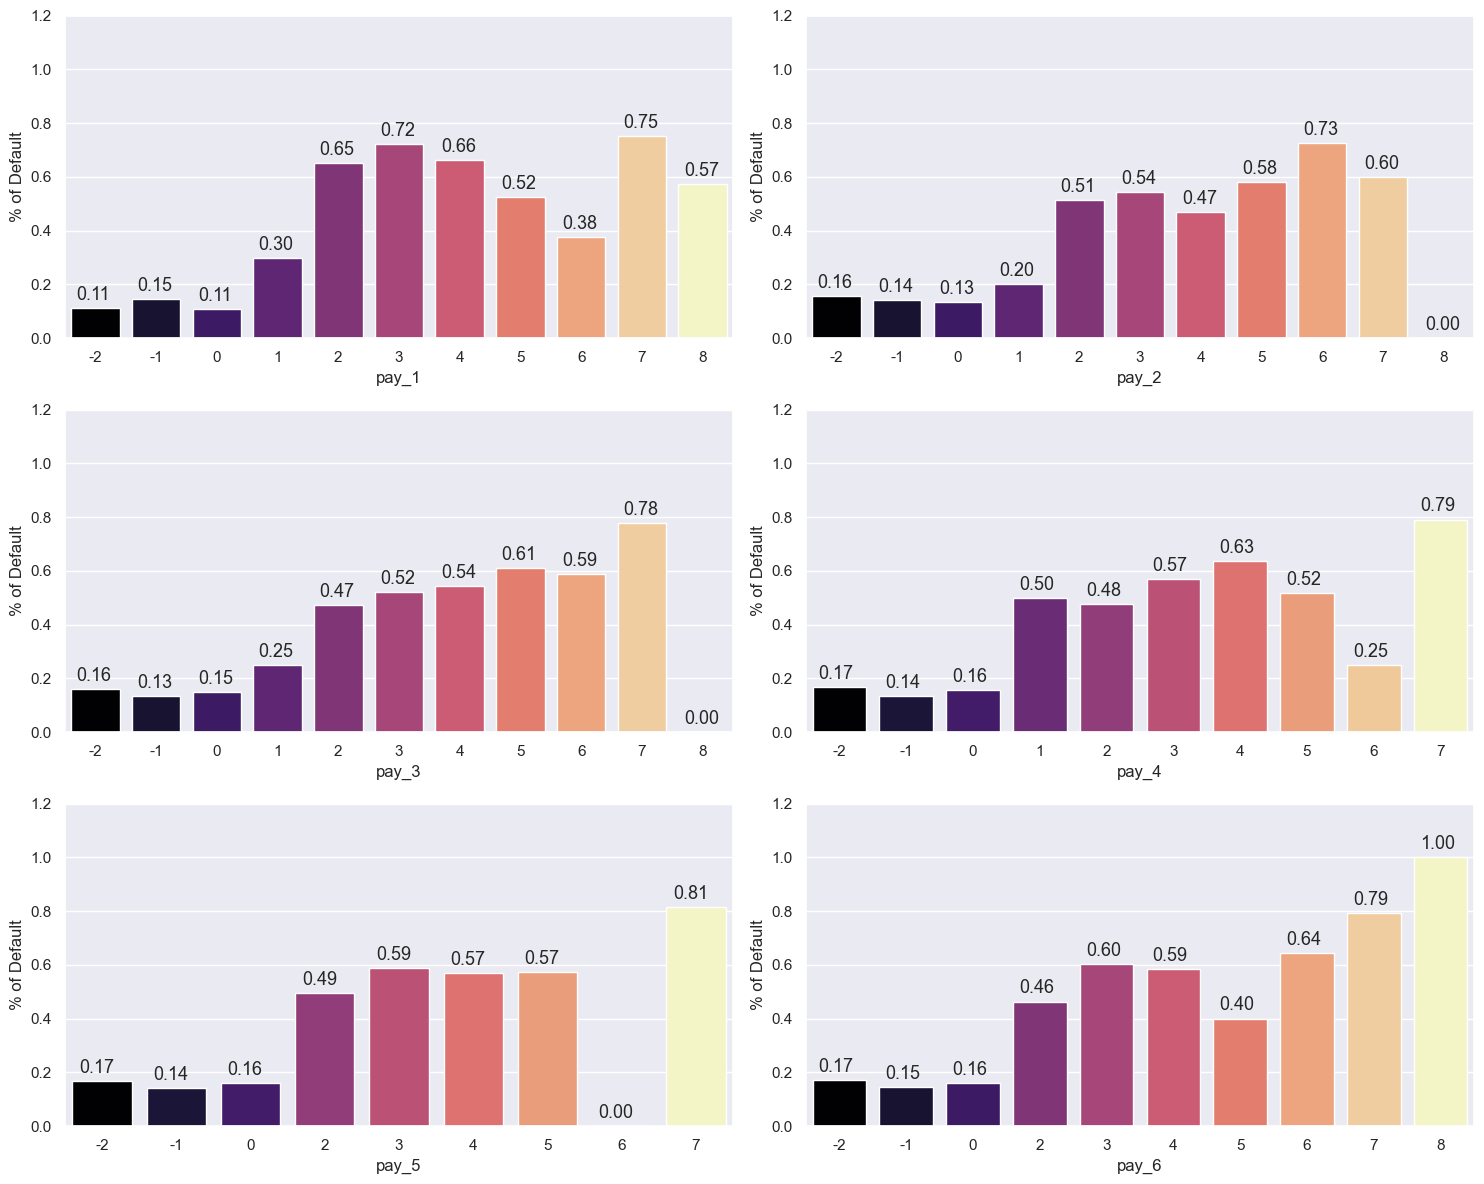

In [64]:
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = train_df, palette = 'magma', errorbar = None,hue=col,legend=False)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.savefig('pay_def.png', dpi=300, bbox_inches='tight')
plt.show()

<I>
<li>Most customers are paying partial or minimum payments, And the likelihood of default are much lower than the rest. </li>
<li>Credit holders who delay their payments for more than 2 months are more likely to face defaults.</li>

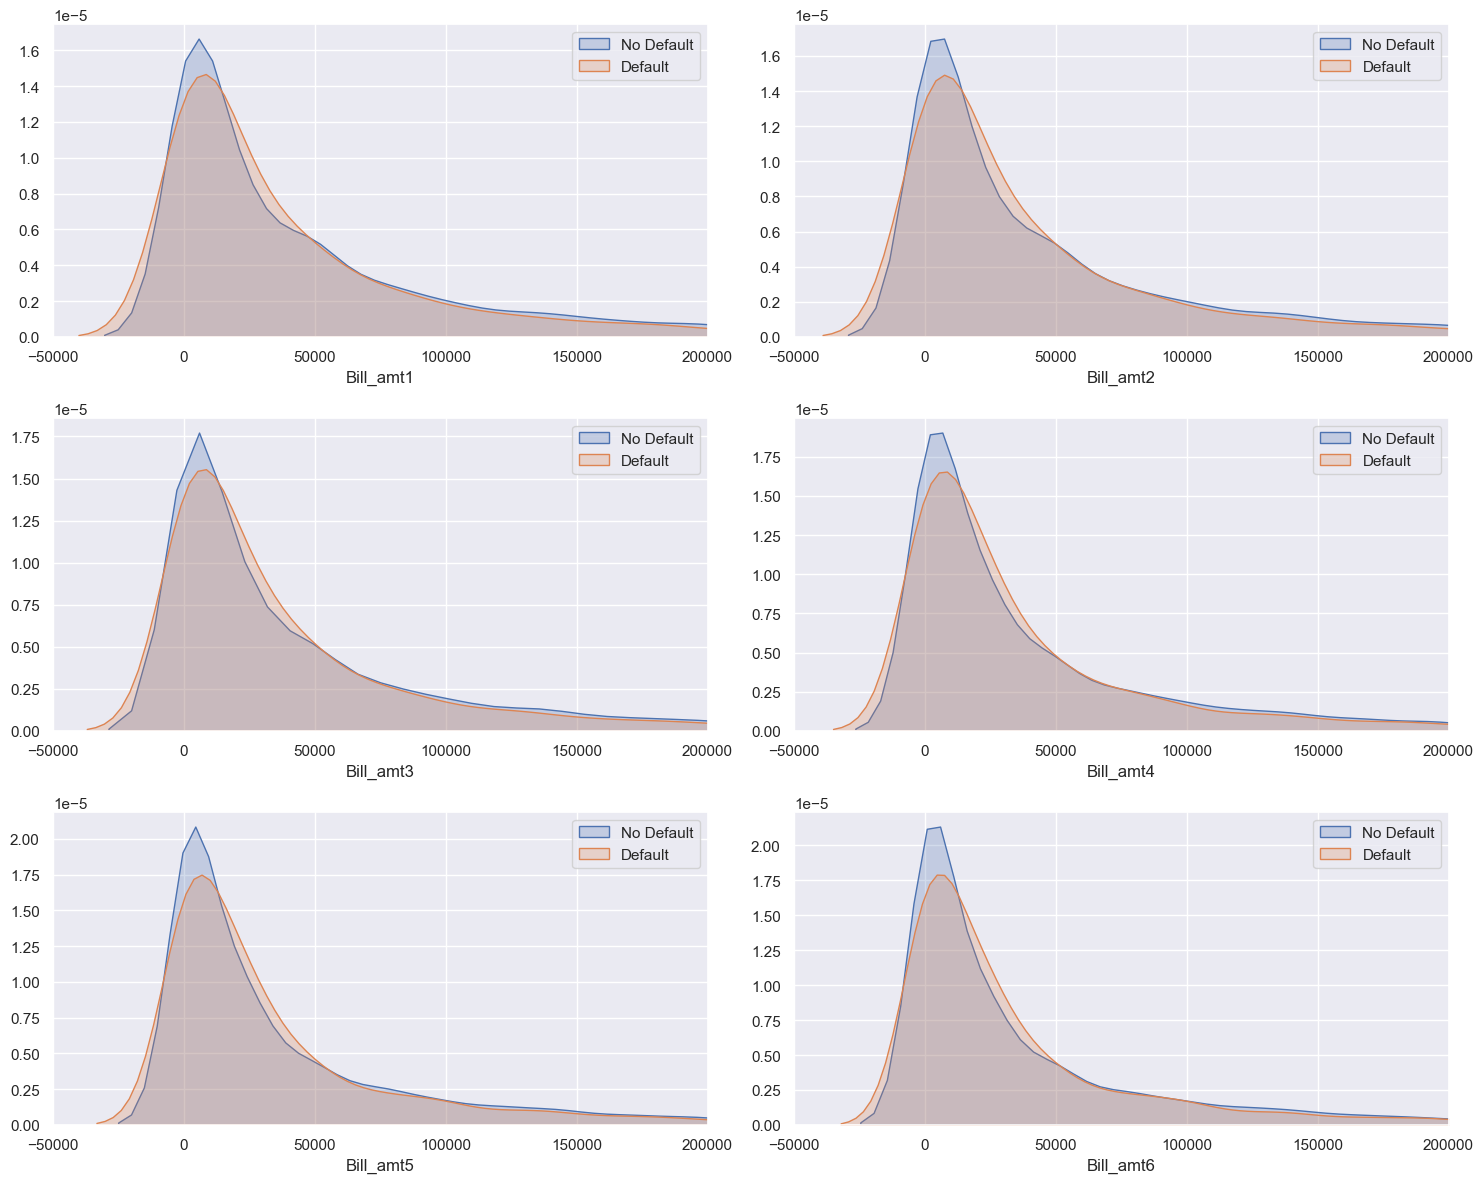

In [66]:
bill_amtx_fts = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(train_df.loc[(train_df['Default'] == 0), col], label = 'No Default', fill=True)
    sns.kdeplot(train_df.loc[(train_df['Default'] == 1), col], label = 'Default', fill = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.savefig('Bill_amt(kde).png', dpi=300, bbox_inches='tight')
plt.show()

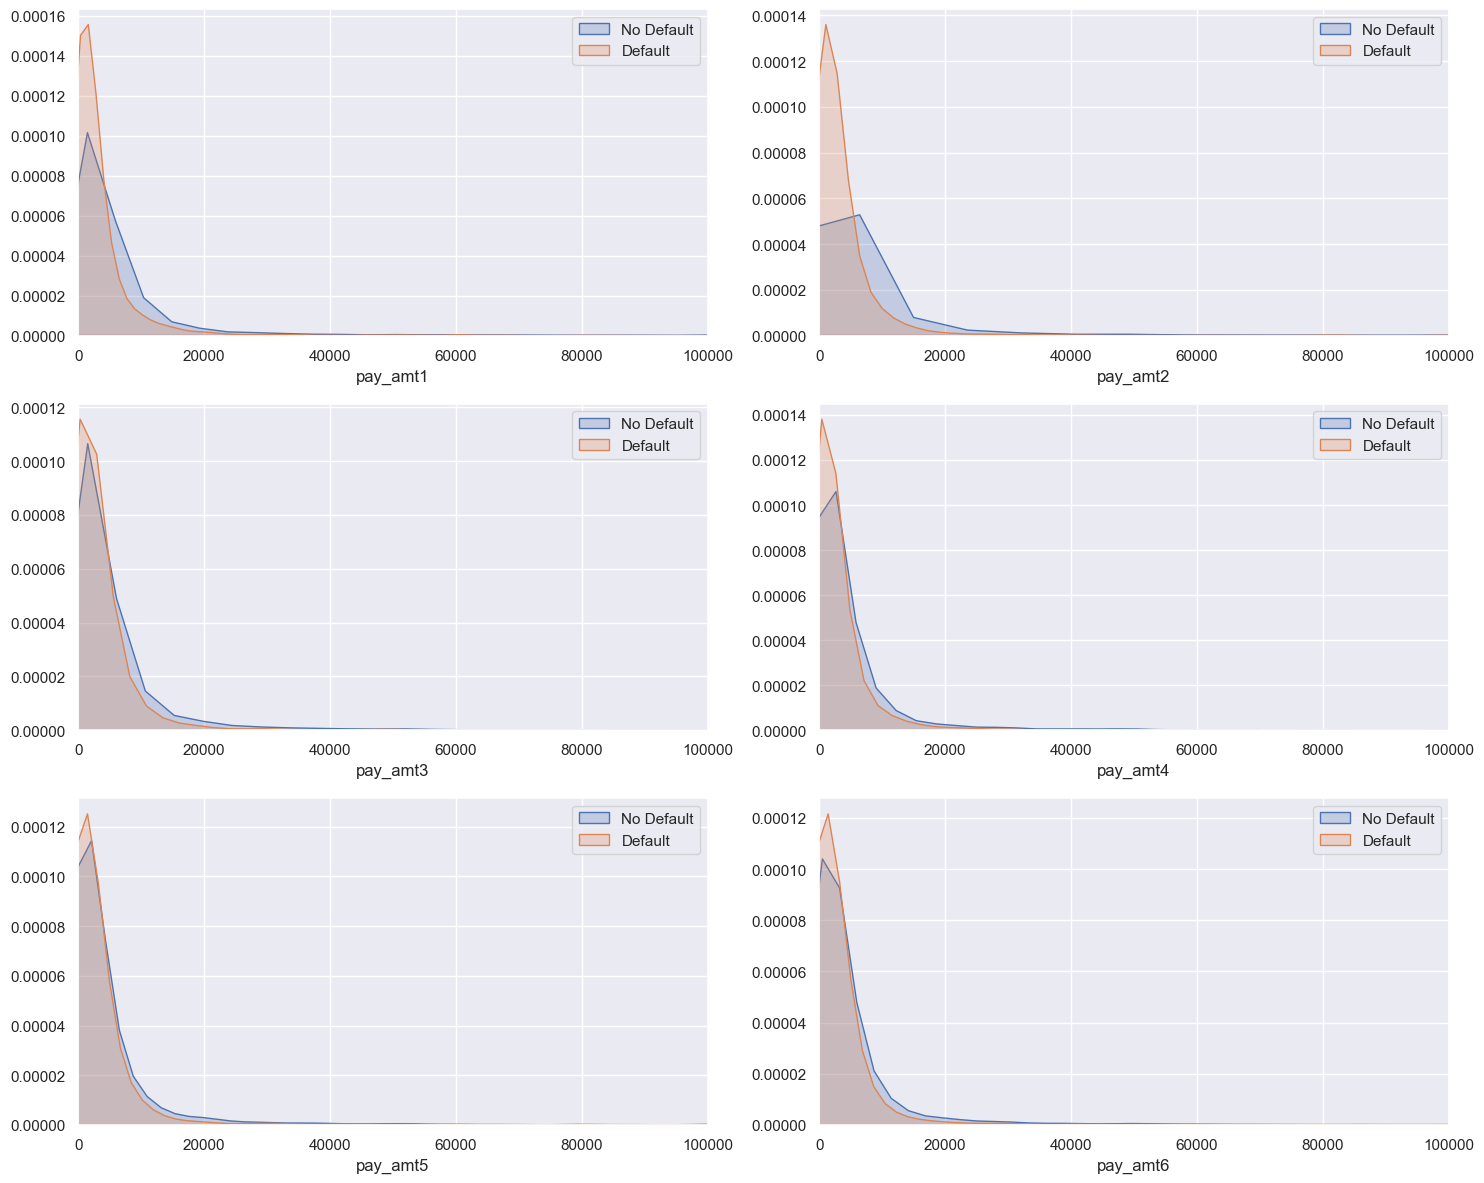

In [67]:
pay_amtx_fts = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 


for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i + 1)   
    sns.kdeplot(train_df.loc[(train_df.Default == 0), col ],label  = 'No Default', fill=True )
    sns.kdeplot(train_df.loc[(train_df.Default == 1), col ], label  = 'Default', fill = True )
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.savefig('pay_amt(kde).png', dpi=300, bbox_inches='tight')
plt.show()

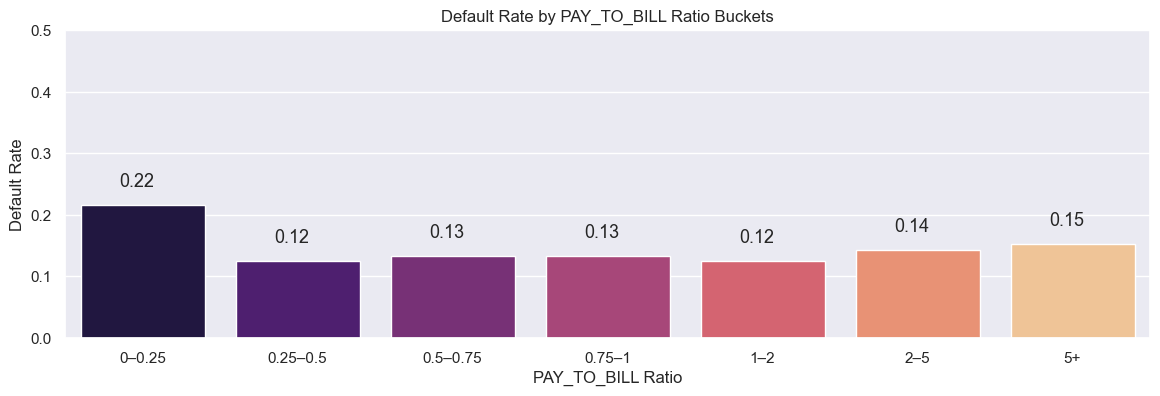

In [68]:
bins = [0, 0.25, 0.5, 0.75, 1, 2, 5, 10]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–1', '1–2', '2–5', '5+']
train_df['pay_to_bill_bin'] = pd.cut(train_df['PAY_TO_BILL_ratio'], bins=bins, labels=labels)

plt.figure(figsize=(14,4))
pay_bin_default = train_df.groupby('pay_to_bill_bin')['Default'].mean().reset_index()

ax = sns.barplot(x='pay_to_bill_bin', y='Default', data=pay_bin_default, palette='magma',hue='pay_to_bill_bin',legend=False)
plt.title("Default Rate by PAY_TO_BILL Ratio Buckets")
plt.ylabel("Default Rate")
plt.xlabel("PAY_TO_BILL Ratio")
plt.ylim(0, 0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.savefig('PayToBill_def.png', dpi=300, bbox_inches='tight')
plt.show()

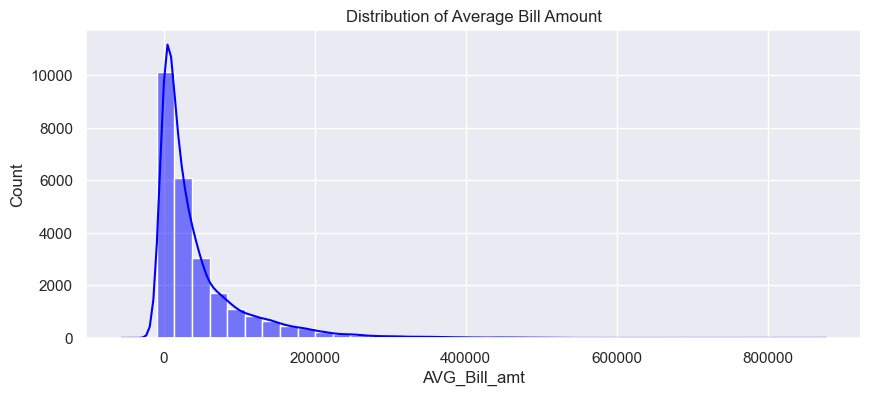

In [69]:
# Distribution before binning
plt.figure(figsize=(10, 4))
sns.histplot(train_df['AVG_Bill_amt'], bins=40, kde=True, color='blue')
plt.title("Distribution of Average Bill Amount")
plt.xlabel("AVG_Bill_amt")
plt.savefig('Avg_bill_amt.png', dpi=300, bbox_inches='tight')
plt.show()

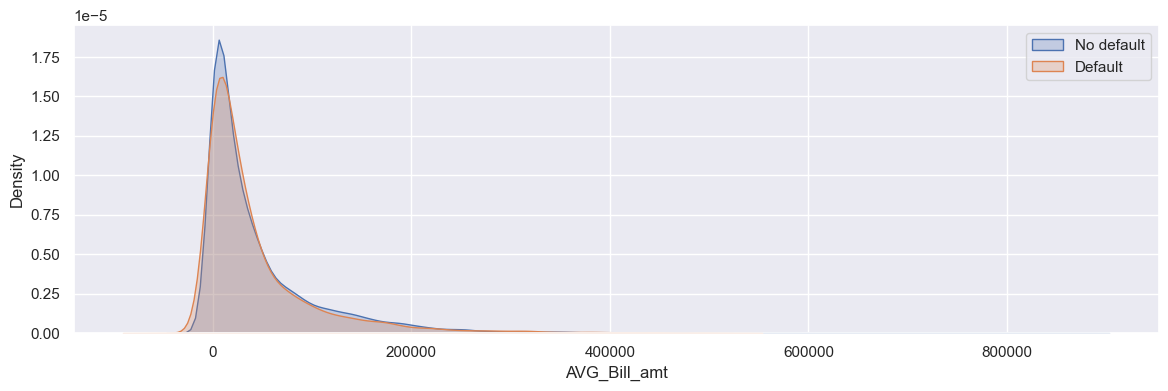

In [70]:
kernel_density('AVG_Bill_amt')

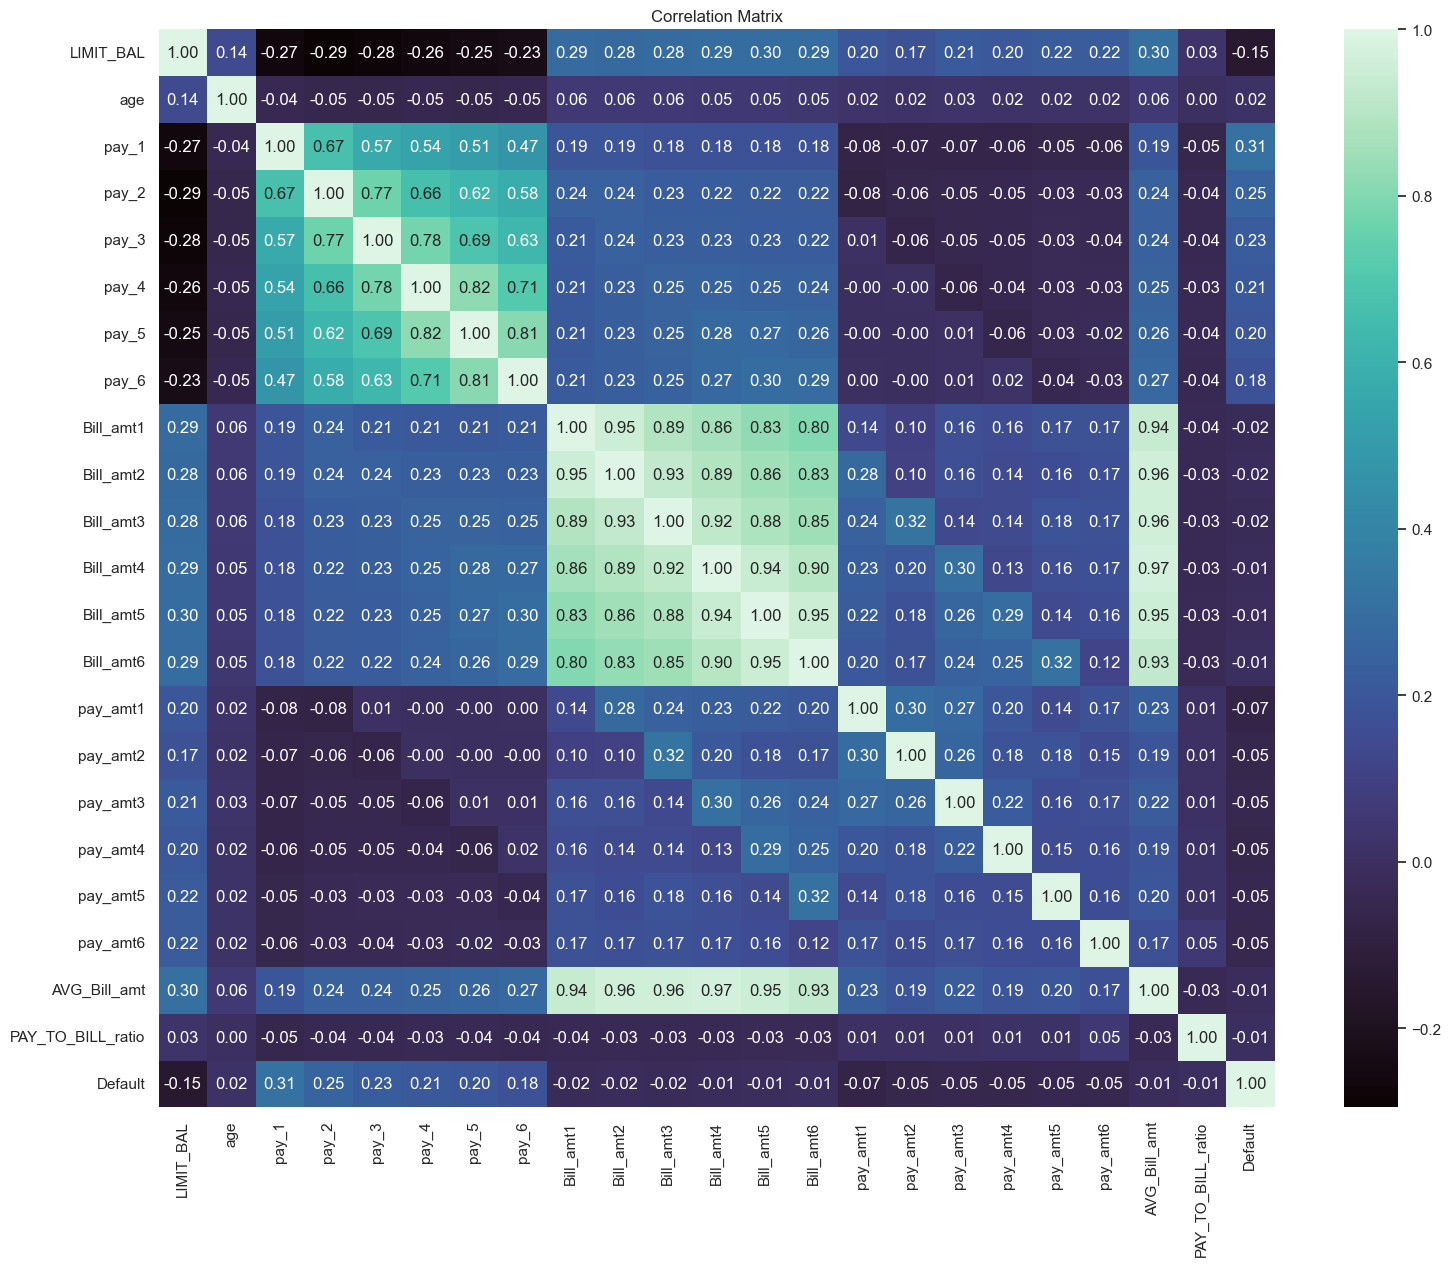

In [71]:
# Calculate correlation matrix
corr_matrix = train_df.corr(numeric_only = True)

#Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako', cbar=True)
plt.title('Correlation Matrix')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

<I>
<li>The AVG_Bill_amt and the Bill_amt_m(1 to 6) are highly correlated.</li>

<h1>Feature Engineering and transformations</h1>

In [74]:
# Credit Utilization Ratio
train_df['credit_util_ratio'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']
val_df['credit_util_ratio'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']

# Delinquency Streak (Max Consecutive Overdue Months)
pay_cols = [f'pay_{i}' for i in range(1,7)]  # pay_0 to pay_6

def longest_streak(row):
    streak = 0
    max_streak = 0
    for val in row:
        if val >= 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

train_df['delinquency_streak'] = train_df[pay_cols].apply(longest_streak, axis=1)
val_df['delinquency_streak'] = val_df[pay_cols].apply(longest_streak, axis=1)

#Payment Coverage Ratio
pay_amt_cols = [f'pay_amt{i}' for i in range(1,7)]
bill_amt_cols = [f'Bill_amt{i}' for i in range(1,7)]
# train_df['payment_coverage'] = train_df[pay_amt_cols].sum(axis=1) / (train_df[bill_amt_cols].sum(axis=1) + 1e-6)
# val_df['payment_coverage'] = val_df[pay_amt_cols].sum(axis=1) / (val_df[bill_amt_cols].sum(axis=1) + 1e-6)


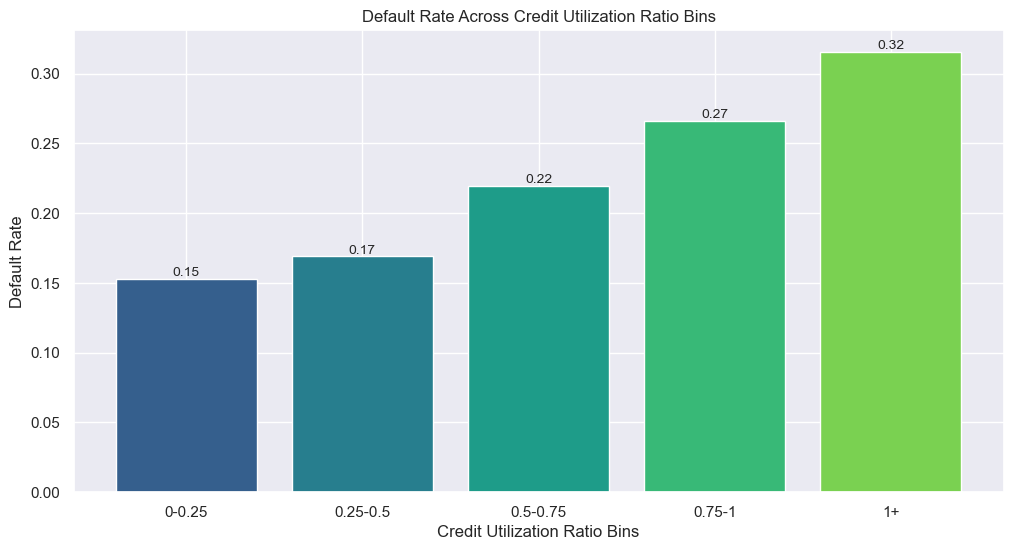

In [75]:
bins = [ 0, 0.25, 0.5, 0.75, 1, np.inf]
labels = [ '0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1', '1+']

# Step 2: Assign bins to the data
train_df['util_bin'] = pd.cut(train_df['credit_util_ratio'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Calculate default rate per bin
default_rate_per_bin = train_df.groupby('util_bin')['Default'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(default_rate_per_bin['util_bin'], default_rate_per_bin['Default'], color=plt.cm.viridis(np.linspace(0.3, 0.8, len(default_rate_per_bin))))
plt.xlabel('Credit Utilization Ratio Bins')
plt.ylabel('Default Rate')
plt.title('Default Rate Across Credit Utilization Ratio Bins')

# Add default rate labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.savefig('credit_util_ratio.png', dpi=300, bbox_inches='tight')
plt.show()

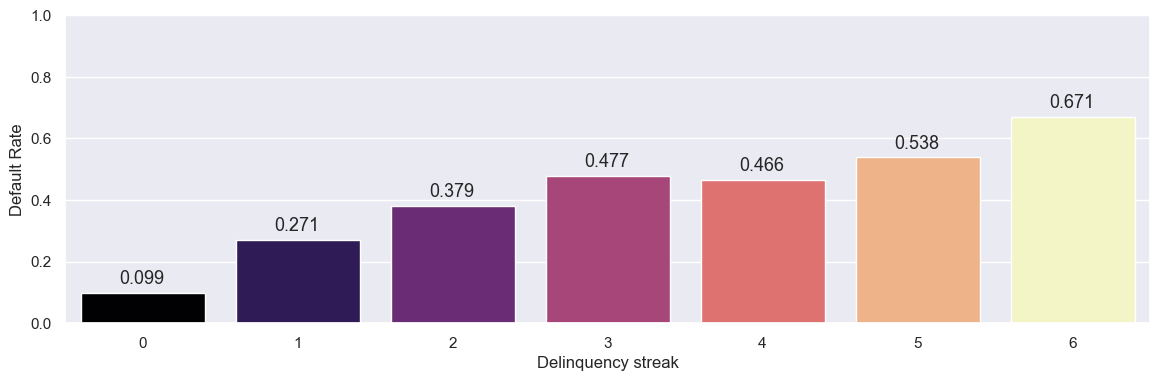

In [131]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "delinquency_streak", y = "Default", data = train_df, palette = 'magma', errorbar = None, hue='delinquency_streak',legend=False)

plt.xlabel("Delinquency streak", fontsize= 12)
plt.ylabel("Default Rate", fontsize= 12)
plt.ylim(0,1)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.savefig('delinquency_streak.png', dpi=300, bbox_inches='tight')
plt.show()

In [133]:
df = train_df.copy()

In [135]:
#Dropping unnecessary columns(that were used only for visualization)
#training dataset
df.drop(columns=['AgeBin','pay_to_bill_bin','LimitBin','util_bin'], axis = 1,inplace=True)
# df.drop(columns=bill_amtx_fts,axis = 1,inplace=True)

# validation dataset
# val_df.drop(columns=bill_amtx_fts,inplace=True)

<h3>One-Hot Encoding</h3>

<h4>Training Dataset</h4>

In [139]:
oh_encoder = OneHotEncoder()
encoded_data = oh_encoder.fit_transform(df[['sex', 'education', 'marriage']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=oh_encoder.get_feature_names_out())
encoded_df.head()

,sex_0,sex_1,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
df = df.join(encoded_df)
df = df.drop(['sex', 'education', 'marriage'], axis=1)
df.head()

,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,Default,credit_util_ratio,delinquency_streak,sex_0,sex_1,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,0.691858,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,0.008740,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,0.280122,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,0.410617,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,0.042194,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<i>
<li> One-hot encoding for categorical features: 'sex,' 'marriage,' and 'education'. </li>
<li> This transforms each category into a separate binary feature (0 or 1).</li>

<h4>Validation Dataset <h4>

In [145]:
encoded_data = oh_encoder.fit_transform(val_df[['sex', 'education', 'marriage']]).toarray()
encoded_val_df = pd.DataFrame(encoded_data, columns=oh_encoder.get_feature_names_out())
encoded_val_df.head()

,sex_0,sex_1,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [147]:
val_df = val_df.join(encoded_df)
val_df = val_df.drop(['sex', 'education', 'marriage'], axis=1)
val_df.head()

,Customer_ID,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,credit_util_ratio,delinquency_streak,sex_0,sex_1,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,1,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,0.106620,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,0.039030,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,0.832368,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,0.666667,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,0.154409,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<h3>Scaling : RobustScaler</h3>

In [150]:
# df = train_df.copy()
#[ 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']

continous_data = df[['LIMIT_BAL' , 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'credit_util_ratio','Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']]
categorical_data = df.drop(columns = ['LIMIT_BAL' , 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio','credit_util_ratio','Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6'] )

scaler = RobustScaler()

X_scaled = scaler.fit_transform(continous_data)
X_scaled_df = pd.DataFrame(X_scaled, columns=continous_data.columns)

train_scaled = pd.concat([X_scaled_df, categorical_data], axis=1)

In [152]:
#Validation Dataset
contin_data = val_df[['LIMIT_BAL' , 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'credit_util_ratio','Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']]
categ_data = val_df.drop(columns = ['LIMIT_BAL' , 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio','credit_util_ratio','Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6'] )

scaler = RobustScaler()

X_scaled = scaler.fit_transform(contin_data)
X_scaled_df = pd.DataFrame(X_scaled, columns=contin_data.columns)

valid_scaled = pd.concat([X_scaled_df, categ_data], axis=1)

In [154]:
X_val = valid_scaled.copy()

<I>
<ul>
    <li> Applying RobustScaler to numerical features to reduce the impact of outliers. </li>
    <li> Unlike StandardScaler, RobustScaler uses the median and IQR, making it more stable on skewed data.</li>
</ul>

<h3>Oversampling: SMOTE technique</h3>

In [158]:
# Set seed for reproducibility
np.random.seed(42)

X_scaled = train_scaled.drop('Default', axis=1)  
y_scaled = train_scaled['Default'] 

In [160]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X_scaled, y_scaled)

<i>
<li>SMOTE generates synthetic samples for the minority class (defaulters) by interpolating between existing instances.</li>
<li>This technique prevents the model from being biased toward the majority class and allows better generalization.</li>

<h1>Model Training </h1>

In [164]:
# Set seed for reproducibility
np.random.seed(42)

# Define helper function to extract metrics
def get_model_metrics(name, y_true, y_pred, y_proba):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba),
        # 'F2' : fbeta_score(y_true,y_proba , beta=2)
    }

results = []

<h3>Logistic Regression: </h3>

=== 5-Fold Stratified Cross-Validation ===
Logistic Regression Cross-Validation Scores: [0.68639922 0.68921233 0.69006849 0.6848092  0.68762231]
Mean Accuracy: 0.6876223091976517

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72     20440
           1       0.74      0.57      0.65     20440

    accuracy                           0.69     40880
   macro avg       0.70      0.69      0.68     40880
weighted avg       0.70      0.69      0.68     40880

F2-Score: 0.6017


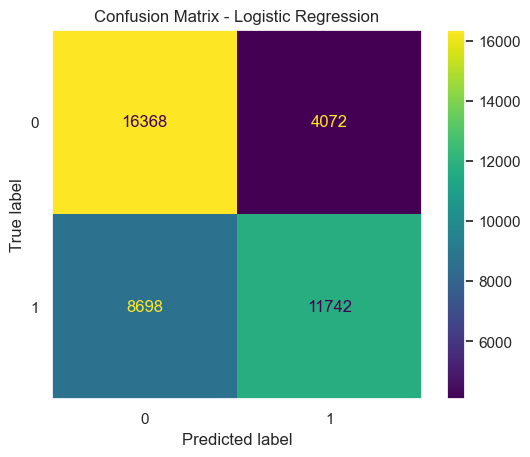

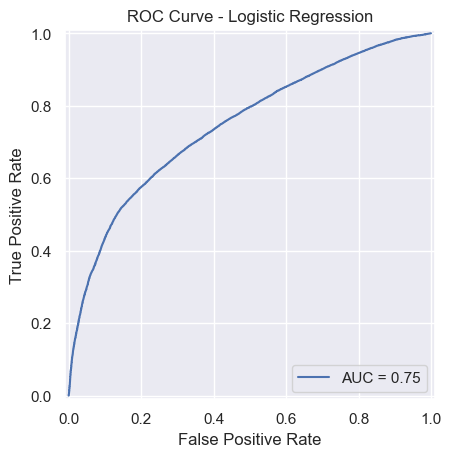

In [167]:
lr_cv = LogisticRegression(max_iter=1000,random_state=42)

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv_scores = cross_val_score(lr_cv, X, y, cv=strat_kfold)
lr_preds = cross_val_predict(lr_cv, X, y, cv=strat_kfold,method='predict')
lr_proba = cross_val_predict(lr_cv, X, y, cv=strat_kfold, method='predict_proba')[:, 1]

print("=== 5-Fold Stratified Cross-Validation ===")
print("Logistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Mean Accuracy:", lr_cv_scores.mean())

print("\nClassification Report for Logistic Regression:")
print(classification_report(y, lr_preds))

f2_lr = fbeta_score(y, lr_preds, beta=2)
print(f"F2-Score: {f2_lr:.4f}")

cm = confusion_matrix(y, lr_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.savefig('cm_lr.png', dpi=300, bbox_inches='tight')
plt.show()

fpr, tpr, _ = roc_curve(y, lr_proba)
roc_auc = roc_auc_score(y, lr_proba)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.savefig('roc_lr.png', dpi=300, bbox_inches='tight')
plt.show()

results.append(get_model_metrics("Logistic Regression", y, lr_preds, lr_proba))

<h3>Decision Tree: </h3>

=== 5-Fold Cross-Validation ===
Decision Tree Cross-Validation Scores: [0.80002446 0.80295988 0.8098092  0.79684442 0.79415362]
Mean Accuracy: 0.8007583170254403

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     20440
           1       0.79      0.81      0.80     20440

    accuracy                           0.80     40880
   macro avg       0.80      0.80      0.80     40880
weighted avg       0.80      0.80      0.80     40880

F2-Score: 0.8104


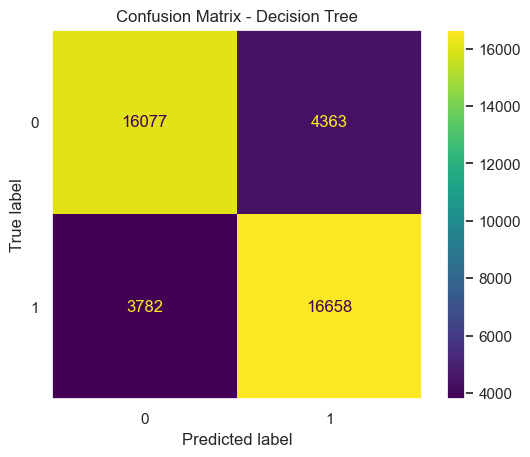

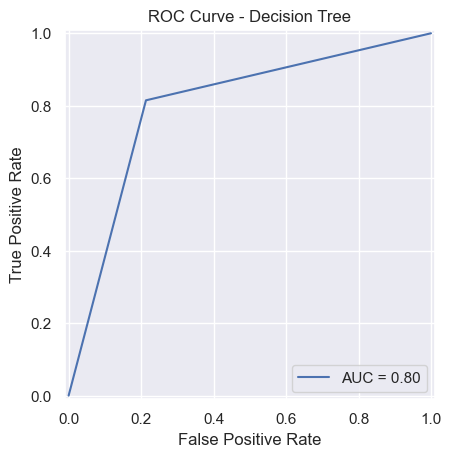

In [169]:
dtree = DecisionTreeClassifier(random_state=42)

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_cv_scores = cross_val_score(dtree, X, y, cv=strat_kfold)
dt_preds = cross_val_predict(dtree, X, y, cv=strat_kfold)
dt_proba = cross_val_predict(dtree, X, y, cv=strat_kfold, method='predict_proba')[:, 1]

print("=== 5-Fold Cross-Validation ===")
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())
print("\nClassification Report for Decision Tree:")
print(classification_report(y, dt_preds))

f2_dt = fbeta_score(y, dt_preds, beta=2)
print(f"F2-Score: {f2_dt:.4f}")

cm = confusion_matrix(y, dt_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.savefig('cm_dt.png', dpi=300, bbox_inches='tight')
plt.show()

fpr, tpr, thresholds = roc_curve(y, dt_proba)
roc_auc = roc_auc_score(y, dt_proba)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.savefig('roc_dt.png', dpi=300, bbox_inches='tight')
plt.show()

results.append(get_model_metrics("Decision Tree", y, dt_preds, dt_proba))

<h3>XGBoost: </h3>


XGBoost Cross-Validation Scores: [0.58622798 0.89383562 0.93297456 0.93431996 0.93896771]
Mean Accuracy: 0.857265166340509

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     20440
           1       0.91      0.79      0.85     20440

    accuracy                           0.86     40880
   macro avg       0.86      0.86      0.86     40880
weighted avg       0.86      0.86      0.86     40880

F2-Score: 0.8127


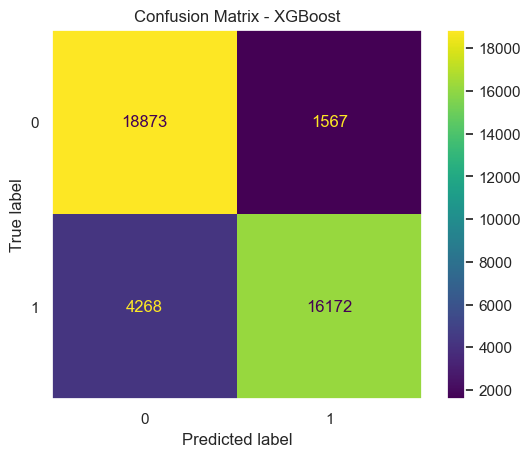

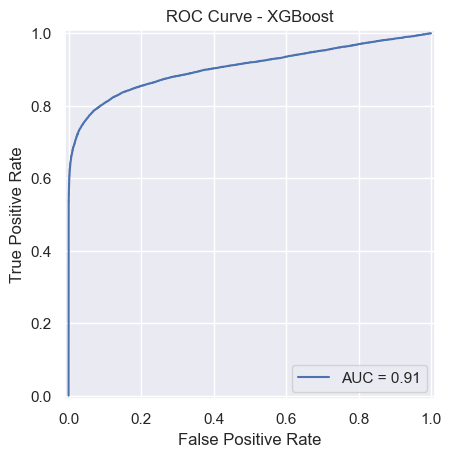

In [171]:
xgb_cv = XGBClassifier(random_state=42, enable_categorical=True)

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_cv_scores = cross_val_score(xgb_cv, X, y, cv=5)
xgb_preds = cross_val_predict(xgb_cv, X, y, cv=5)
xgb_proba = cross_val_predict(xgb_cv, X, y, cv=5, method='predict_proba')[:, 1]

print("\nXGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())
print("\nClassification Report for XGBoost:")
print(classification_report(y, xgb_preds))

f2_xgb = fbeta_score(y, xgb_preds, beta=2)
print(f"F2-Score: {f2_xgb:.4f}")

cm = confusion_matrix(y, xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.savefig('cm_xgb.png', dpi=300, bbox_inches='tight')
plt.show()

fpr, tpr, thresholds = roc_curve(y, xgb_proba)
roc_auc = roc_auc_score(y, xgb_proba)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - XGBoost")
plt.grid(True)
plt.savefig('roc_xgb.png', dpi=300, bbox_inches='tight')
plt.show()

results.append(get_model_metrics("XGBoost", y, xgb_preds, xgb_proba))

<h3>LightGBM: </h3>

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6424
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6317
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

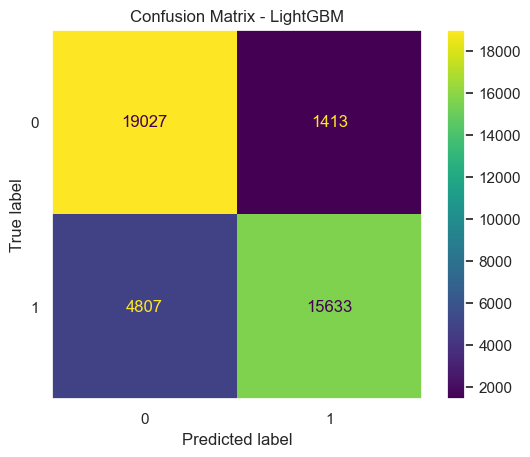

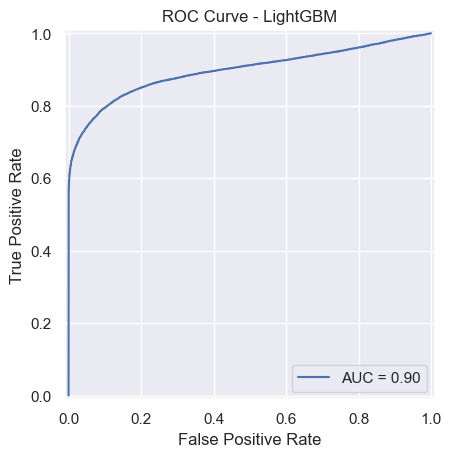

In [173]:
lgbm_cv = LGBMClassifier(random_state=42)
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm_cv_scores = cross_val_score(lgbm_cv, X, y, cv=5)
lgbm_preds = cross_val_predict(lgbm_cv, X, y, cv=5)
lgbm_proba = cross_val_predict(lgbm_cv, X, y, cv=5, method='predict_proba')[:, 1]

print("\nLightGBM Cross-Validation Scores:", lgbm_cv_scores)
print("Mean Accuracy:", lgbm_cv_scores.mean())
print("\nClassification Report for LightGBM:")
print(classification_report(y, lgbm_preds))

f2_lgbm = fbeta_score(y, lgbm_preds, beta=2)
print(f"F2-Score: {f2_lgbm:.4f}")

cm = confusion_matrix(y, lgbm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)
plt.savefig('cm_lgbm.png', dpi=300, bbox_inches='tight')
plt.show()

fpr, tpr, thresholds = roc_curve(y, lgbm_proba)
roc_auc = roc_auc_score(y, lgbm_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - LightGBM")
plt.grid(True)
plt.savefig('roc_lgbm.png', dpi=300, bbox_inches='tight')
plt.show()

results.append(get_model_metrics("LightGBM", y, lgbm_preds, lgbm_proba))

In [174]:
f2_scores = {
    'Logistic Regression': f2_lr,
    'Decision Tree': f2_dt,
    'XGBoost': f2_xgb,
    'LightGBM' :f2_lgbm
}
for entry in results:
    model_name = entry['Model']
    entry['f2'] = f2_scores[model_name]

In [175]:
# Comparision of different models 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1', ascending=False).reset_index(drop=True)
results_df = results_df.round(4)

print("=== Model Performance Comparison ===")
results_df

=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,f2
0,XGBoost,0.8573,0.9117,0.7912,0.8472,0.9059,0.8127
1,LightGBM,0.8478,0.9171,0.7648,0.8341,0.8979,0.7911
2,Decision Tree,0.8008,0.7924,0.8150,0.8036,0.8008,0.8104
3,Logistic Regression,0.6876,0.7425,0.5745,0.6478,0.7460,0.6017


<i>
<li><b>XGBoost</b> performs best overall with highest F1 (0.8472), F2 (0.8127) and ROC-AUC (0.9059) — best balance and discrimination.</li>
<li><b>LightGBM</b> has the highest Precision (0.9171) — ideal if false positives are more costly.</li>
<li><b>Decision Tree</b> gives the highest Recall (0.8150) — useful if catching all defaulters is critical..</li>
<li><b>Logistic Regression</b> underperforms — lowest F1 and AUC, less suited for complex patterns..</li>


<h1>Hyperparameter Tuning</h1>

<h3> GridSearchCV (XGBoost):</h3>

In [179]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                    scoring='f1', cv=strat_kfold, n_jobs=-1, verbose=1)

grid.fit(X, y)

print("✅ Best Parameters:", grid.best_params_)
print("🎯 Best F1 from GridSearch:", grid.best_score_)

best_model = grid.best_estimator_

y_proba = cross_val_predict(best_model, X, y, cv=strat_kfold, method='predict_proba')[:, 1]
# y_preds_default = (y_proba >= 0.5).astype(int)  # For comparison

xgb_cv_scores = cross_val_score(best_model, X, y, cv=strat_kfold)
xgb_preds = cross_val_predict(best_model, X, y, cv=strat_kfold)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
🎯 Best F1 from GridSearch: 0.8638261599767164



XGBoost Cross-Validation Scores: [0.87047456 0.87340998 0.86594912 0.86741683 0.87818004]
Mean Accuracy: 0.8710861056751469

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     20440
           1       0.92      0.82      0.86     20440

    accuracy                           0.87     40880
   macro avg       0.88      0.87      0.87     40880
weighted avg       0.88      0.87      0.87     40880

F2-Score: 0.8347


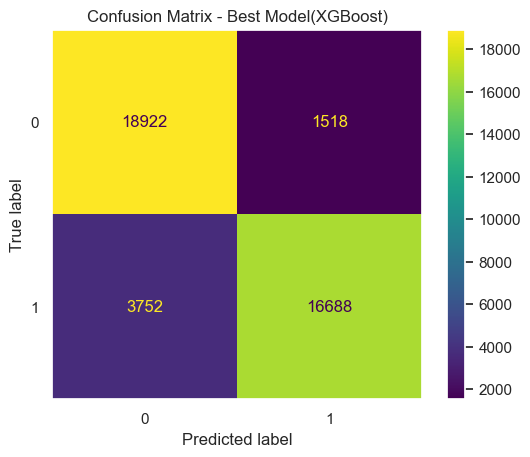

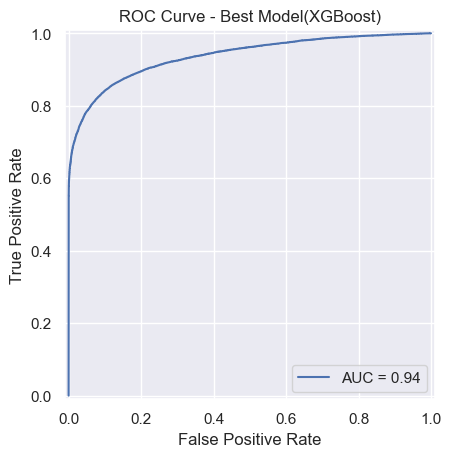

In [180]:
print("\nXGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())
print("\nClassification Report for XGBoost:")
print(classification_report(y, xgb_preds))

f2 = fbeta_score(y, xgb_preds, beta=2)
print(f"F2-Score: {f2:.4f}")

cm = confusion_matrix(y, xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Best Model(XGBoost)")
plt.grid(False)
plt.savefig('cm_best.png', dpi=300, bbox_inches='tight')
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = roc_auc_score(y, y_proba)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - Best Model(XGBoost)")
plt.grid(True)
plt.savefig('roc_best.png', dpi=300, bbox_inches='tight')
plt.show()
# print(f1_score(y,xgb_preds))

In [181]:
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter Grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search for Decision Tree
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, 
                       scoring='f1', cv=strat_kfold, n_jobs=-1, verbose=1)

dt_grid.fit(X, y)

print("✅ Best Parameters for Decision Tree:", dt_grid.best_params_)
print("🎯 Best F1 from GridSearch (Decision Tree):", dt_grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
🎯 Best F1 from GridSearch (Decision Tree): 0.8118831855885447


<i><br>
<li>A 5-fold GridSearchCV was used to tune key XGBoost parameters (n_estimators, max_depth, learning_rate, subsample) using F1-score as the optimization metric</li>
<li>Compared to the baseline model, the tuned model significantly improved precision for the minority class (1) from 0.91 to 0.92 and recall from 0.79 to 0.82, resulting in a balanced F1-score of 0.86.</li>
<li>The mean cross-validation accuracy improved from 85.7% to 87.1%, indicating that the tuned model generalizes better across different data splits.</li>
<li>The ROC-AUC improved from 0.90 to 0.94, reflecting stronger separation between defaulters and non-defaulters. The confusion matrix also shows a drop in false negatives, crucial in credit risk classification.</li>

<h1>Classification threshold: </h1>

In [184]:
precision, recall, thresholds = precision_recall_curve(y, y_proba)
f1_scores = 2 * precision * recall / (precision + recall + 1e-8)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔧 Best Threshold: {best_threshold:.4f}")
print(f"🚀 Best F1 at Optimal Threshold: {best_f1:.4f}")

🔧 Best Threshold: 0.4357
🚀 Best F1 at Optimal Threshold: 0.8672


In [185]:
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# Calculate F2-score at this threshold
f2_at_optimal = fbeta_score(y, y_pred_optimal, beta=2)

print(f"🎯 F2-Score at Optimal Threshold: {f2_at_optimal:.4f}")

🎯 F2-Score at Optimal Threshold: 0.8528


In [186]:
accuracy_at_optimal = accuracy_score(y, y_pred_optimal)
print(accuracy_at_optimal)

0.8708170254403131


In [187]:
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Youden's J statistic
youden_j = tpr - fpr

# Find threshold that maximizes Youden’s J
best_j_idx = np.argmax(youden_j)
best_threshold_j = thresholds[best_j_idx]

print(f"📈 Best Youden's J Threshold: {best_threshold_j:.4f}")
print(f"TPR at this threshold: {tpr[best_j_idx]:.4f}")
print(f"FPR at this threshold: {fpr[best_j_idx]:.4f}")

📈 Best Youden's J Threshold: 0.4575
TPR at this threshold: 0.8342
FPR at this threshold: 0.0911


In [188]:
# y: true labels, y_proba: predicted probabilities from modeln
fpr, tpr, roc_thresholds = roc_curve(y, y_proba)

def evaluate_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    fpr_val = fp / (fp + tn)
    fnr_val = fn / (fn + tp)
    
    print(f"\n📊 Threshold: {threshold:.4f}")
    print(f"TPR / Recall: {recall:.4f}")
    print(f"FPR: {fpr_val:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"False Negatives (FN): {fn}")
    print(f"False Positives (FP): {fp}")
    print(f"Confusion Matrix:\n{cm}")
    
    return 
    # {
    #     'threshold': threshold,
    #     'recall': recall,
    #     'fpr': fpr_val,
    #     'precision': precision,
    #     'fn': fn,
    #     'fp': fp,
    #     'conf_matrix': cm
    # }

# Optional: Try bank-specific thresholds
evaluate_threshold(0.30)  # Aggressive (recall focus)
evaluate_threshold(0.50)  # Default
evaluate_threshold(0.70)  # Conservative (precision focus)



📊 Threshold: 0.3000
TPR / Recall: 0.8984
FPR: 0.2079
Precision: 0.8121
False Negatives (FN): 2076
False Positives (FP): 4250
Confusion Matrix:
[[16190  4250]
 [ 2076 18364]]

📊 Threshold: 0.5000
TPR / Recall: 0.8164
FPR: 0.0743
Precision: 0.9166
False Negatives (FN): 3752
False Positives (FP): 1518
Confusion Matrix:
[[18922  1518]
 [ 3752 16688]]

📊 Threshold: 0.7000
TPR / Recall: 0.7243
FPR: 0.0230
Precision: 0.9692
False Negatives (FN): 5635
False Positives (FP): 470
Confusion Matrix:
[[19970   470]
 [ 5635 14805]]


<h1>Model Explainability: </h1>

<h3>Importance plot:</h3>

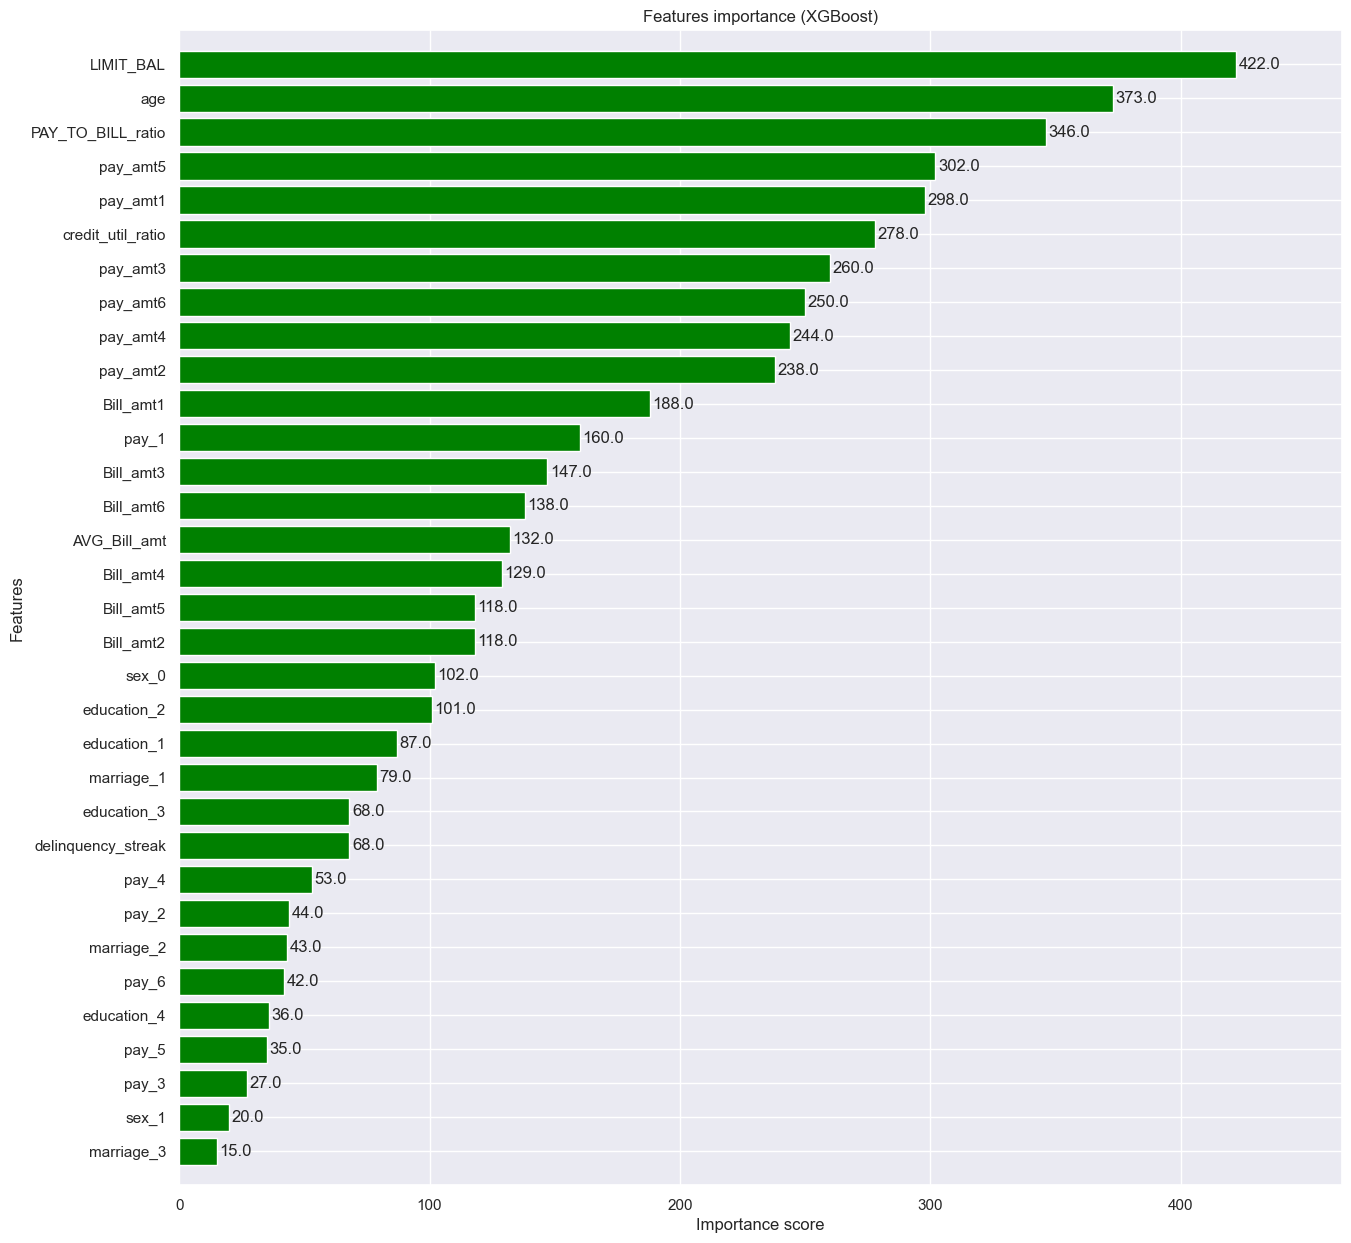

In [192]:
import xgboost as xgb
fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
xgb.plot_importance(best_model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.savefig('xgb_imp.png', dpi=300, bbox_inches='tight')
plt.show()

<h3>SHAP: </h3>

100%|===================| 40824/40880 [11:54<00:00]        

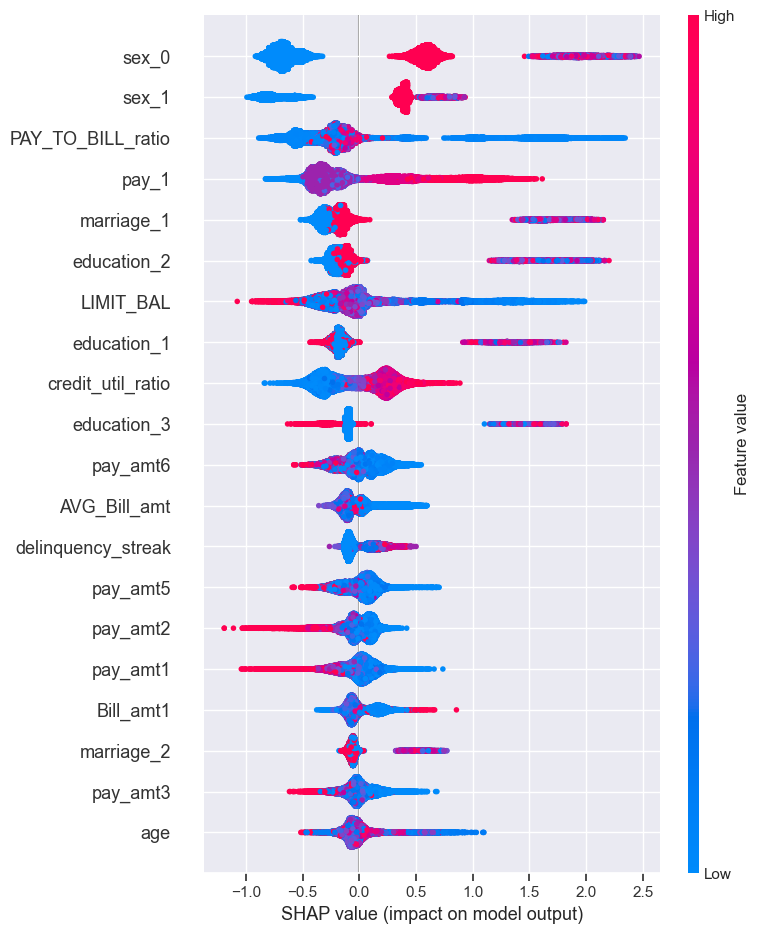

In [220]:
import shap
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, feature_names=X.columns)

<br>
<i>
<li>XGBoost Feature Importance showed that LIMIT_BAL, age, and PAY_TO_BILL_ratio were most used in decision tree splits, highlighting their structural value in the mode.</li>
<li>However, the SHAP summary plot revealed that features like pay_1, PAY_TO_BILL_ratio, and some categorical encodings (e.g., sex_1, education_2) had stronger actual impact on the final prediction.</li>
<li>his difference emphasizes that usage in trees ≠ predictive influence — SHAP uncovers the real-world effect each feature has on increasing or decreasing default risk.</li>
<li>Notably, high repayment-to-bill ratios and recent missed payments (pay_1) strongly push predictions toward default, confirming domain intuition.</li>
<br>

<h1>Final Prediction:</h1>

In [207]:
Cus_ID = X_val['Customer_ID']
X_val = X_val.drop(columns = ['Customer_ID'])

In [209]:
y_val_proba = best_model.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

final_predictions = pd.DataFrame({
    'Customer': Cus_ID,
    'next_month_default': y_val_pred
})

final_predictions.to_csv("final_predictions.csv", index=False)
print("✅ Predictions saved to final_predictions.csv")

✅ Predictions saved to final_predictions.csv
